# BottomTrendFollow Researches

# Profit Factor Analysis Summary

Obtain results with naive transaction that no adjusting lot, leverage, and trading strategy.
Analyze results with profit factor and timeframe

まずはナイーブな取引、つまりロットもレバレッジも取引戦略も調整していない取引の結果を集計、計算する。
そしてプロフィットファクターと時間足についても調査する。

In [1]:
%matplotlib inline
import research_kit_bottom_trend_follow as rk

backtest_start_time = rk.datetime(2019,9,30,11,49)
backtest_end_time = rk.datetime(2019,12,29,11,49)
    
ohlcv_df_1min = rk.dataset_manager.get_ohlcv(start_time=backtest_start_time, end_time=backtest_end_time)
ohlcv_with_ta = rk.add_technical_statistics_to_ohlcv_df(ohlcv_df_1min)

id_timeframe1_bottom5_middle3_top1 = rk.get_summary_id_by_params_set(1,5,3,1)
params_df, summary_df, transaction_log_df = rk.get_params_summary_log_df_by_summary_id(id_timeframe1_bottom5_middle3_top1)

downloading BTC/USD data on bitmex
downloading 2019-12-31 16:22:30 ~ 2019-12-31 16:22:53.416427 data
No data downloaded
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Done


In [2]:
win_transaction_log = transaction_log_df[transaction_log_df.profit_status == "win"]
lose_transaction_log = transaction_log_df[transaction_log_df.profit_status == "lose"]

win_merged_close = rk.pd.merge(win_transaction_log, ohlcv_with_ta, left_on="close_time", right_on=ohlcv_with_ta.index)
lose_merged_close = rk.pd.merge(lose_transaction_log, ohlcv_with_ta, left_on="close_time", right_on=ohlcv_with_ta.index)

win_merged_open = rk.pd.merge(win_transaction_log, ohlcv_with_ta, left_on="entry_time", right_on=ohlcv_with_ta.index)
lose_merged_open = rk.pd.merge(lose_transaction_log, ohlcv_with_ta, left_on="entry_time", right_on=ohlcv_with_ta.index)

win_merged_close_vol_10 = win_merged_close.head(10)["ad"]
win_merged_open_vol_10 = win_merged_open.head(10)["ad"]
#print(rk.pd.concat([win_merged_close_vol_10, win_merged_open_vol_10], axis=1))

In [3]:
def create_hist(win_merged, lose_merged, focus_factor=""):
    rk.plt.rcParams['figure.figsize'] = (20.0, 20.0)
    win = win_merged[focus_factor]
    lose = lose_merged[focus_factor]
    
    bins = 200
    
    figure = rk.plt.figure()
    figure.suptitle(focus_factor + " between win and lose")
    
    for i, win_lose in enumerate(["win", "lose"]):
        graph = figure.add_subplot(1,2,1+i)
        if win_lose == "win":
            graph.hist(win, bins=bins)
        else:
            graph.hist(lose, bins=bins)
        graph.set_title( focus_factor + " on " + win_lose)
        graph.set_xlabel(focus_factor)
        graph.set_ylabel("freq")
        
    rk.plt.show()
        
    win_mean = win_merged[focus_factor].mean()
    lose_mean = lose_merged[focus_factor].mean()
    print("win " + focus_factor + " mean => " + str(win_mean))
    print("lose " + focus_factor + " mean => " + str(lose_mean))
    
    win_std = win_merged[focus_factor].std()
    lose_std = lose_merged[focus_factor].std()
    print("win " + focus_factor + " standard deviation => " + str(win_std))
    print("lose " + focus_factor + " standard deviation => " + str(lose_std))
    
    win_med = win_merged[focus_factor].median()
    lose_med = lose_merged[focus_factor].median()
    print("win " + focus_factor + " median => " + str(win_med))
    print("lose " + focus_factor + " median => " + str(lose_med))

In [4]:
rk.pprint(list(win_merged_close.columns)) 

['asset_name_x',
 'backtest_summary_id',
 'close_price',
 'close_time',
 'current_balance',
 'entry_price',
 'entry_time',
 'exchange_name_x',
 'id_x',
 'leverage',
 'lot',
 'order_status',
 'order_type',
 'price_difference',
 'price_difference_percentage',
 'profit_percentage',
 'profit_size',
 'profit_status',
 'transaction_cost',
 'asset_name_y',
 'close',
 'exchange_name_y',
 'high',
 'id_y',
 'low',
 'open',
 'volume',
 'psar',
 'psar_trend',
 'ema_5',
 'ema_3',
 'ema_1',
 'ad',
 'atr',
 'obv',
 'roc',
 'rsi',
 'slowk',
 'slowd',
 'williams_r',
 'wma']


close time state


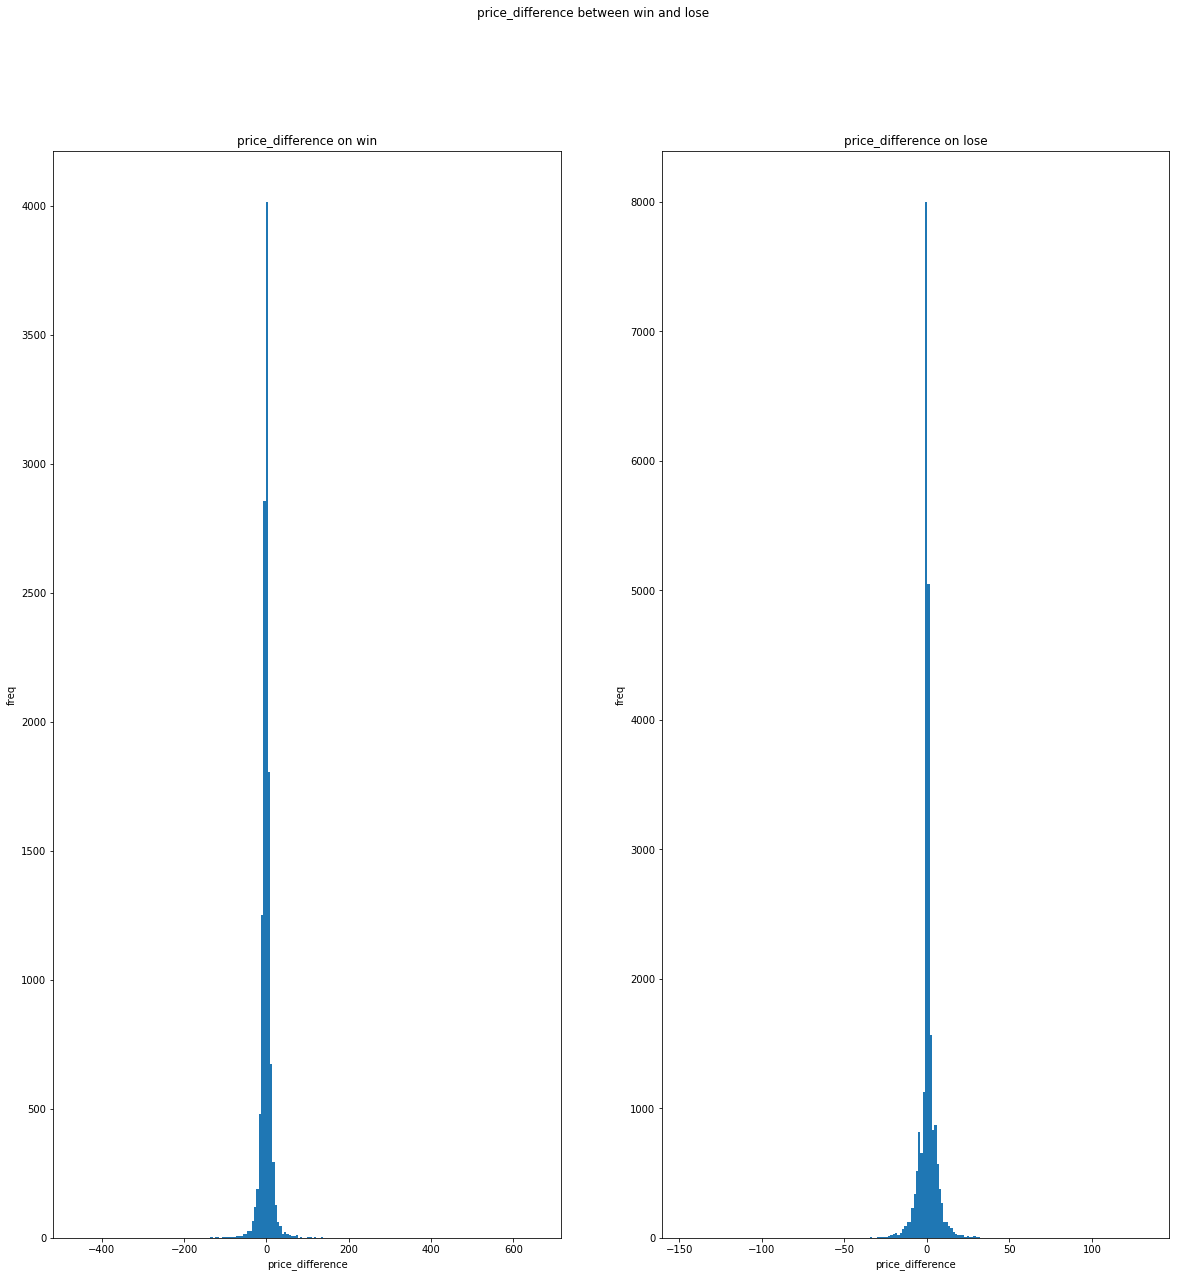

win price_difference mean => -0.6608834095362508
lose price_difference mean => 0.3461743653581114
win price_difference standard deviation => 16.806376564696677
lose price_difference standard deviation => 5.534268147121712
win price_difference median => -0.5
lose price_difference median => 0.0
open time state


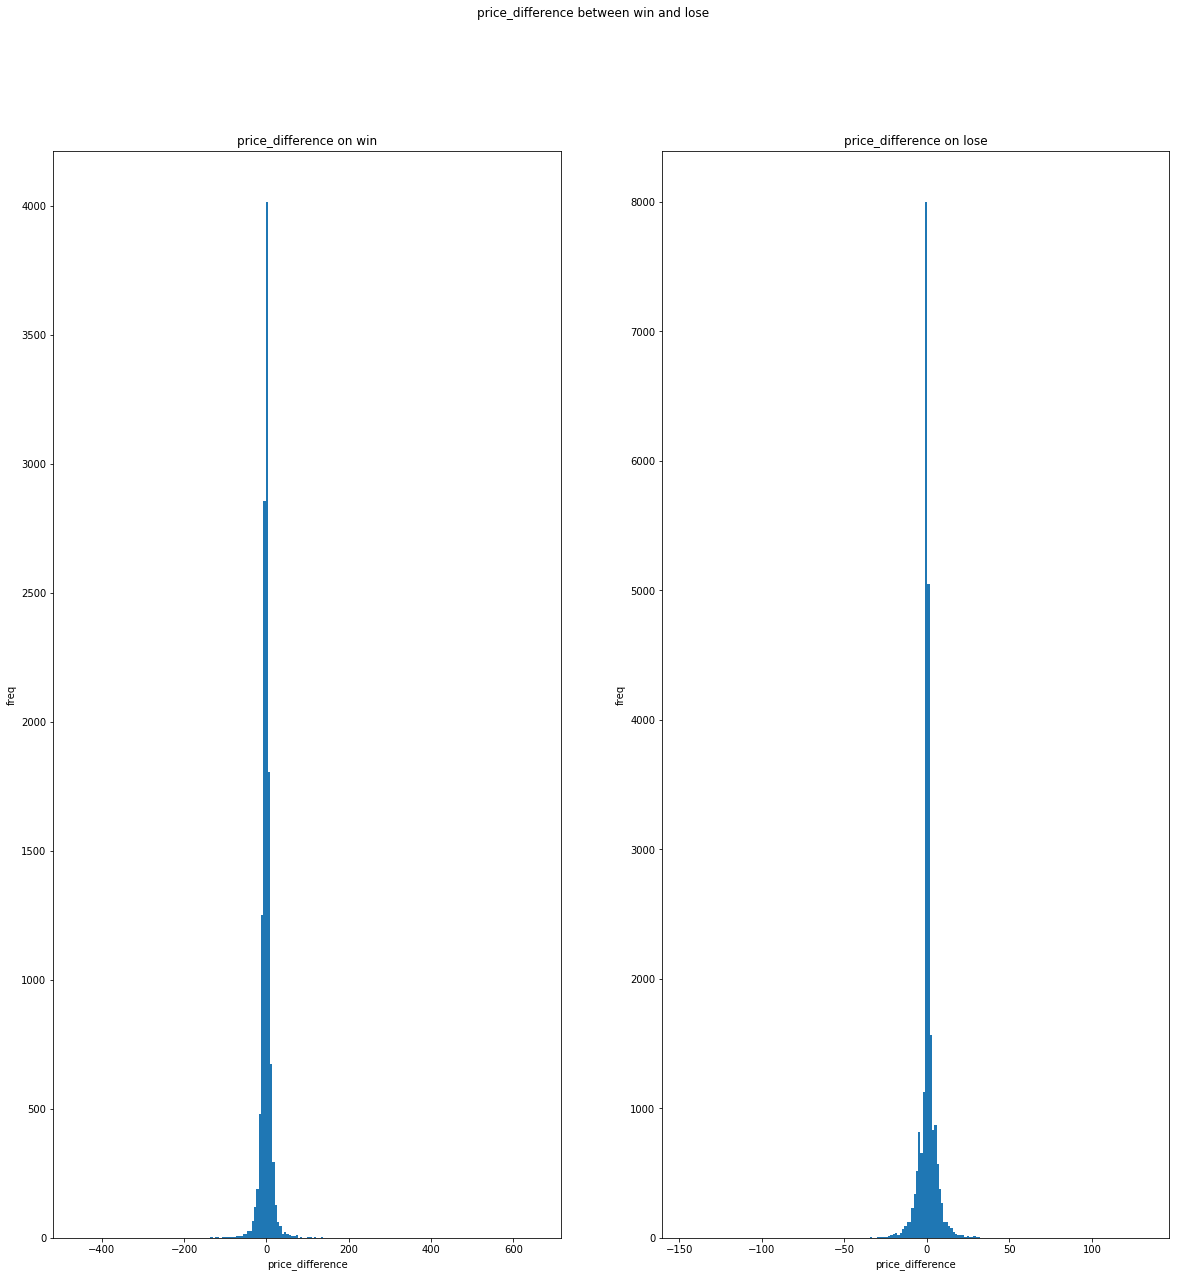

win price_difference mean => -0.6608834095362508
lose price_difference mean => 0.3461743653581114
win price_difference standard deviation => 16.806376564696677
lose price_difference standard deviation => 5.534268147121712
win price_difference median => -0.5
lose price_difference median => 0.0


In [5]:
print("close time state")
create_hist(win_merged_close, lose_merged_close, "price_difference")
print("open time state")
create_hist(win_merged_open, lose_merged_open, "price_difference")

### Price Difference Summary

#### closed
勝ちの値幅の変動がマイナスであること、負けの値幅の変動がマイナスである。
勝ちの値幅の標準偏差が負けに比べて非常に大きい。

勝っているときの値幅の変動がマイナスであることから、勝ちトレードにショートが多いと予想した。
結果は予想通りだったが、負けトレードにおけるショートの割合はさらに多かった。
ここにおいてはハイリスクハイリターンの関係が成立している。

#### open
結果は全く変化なし

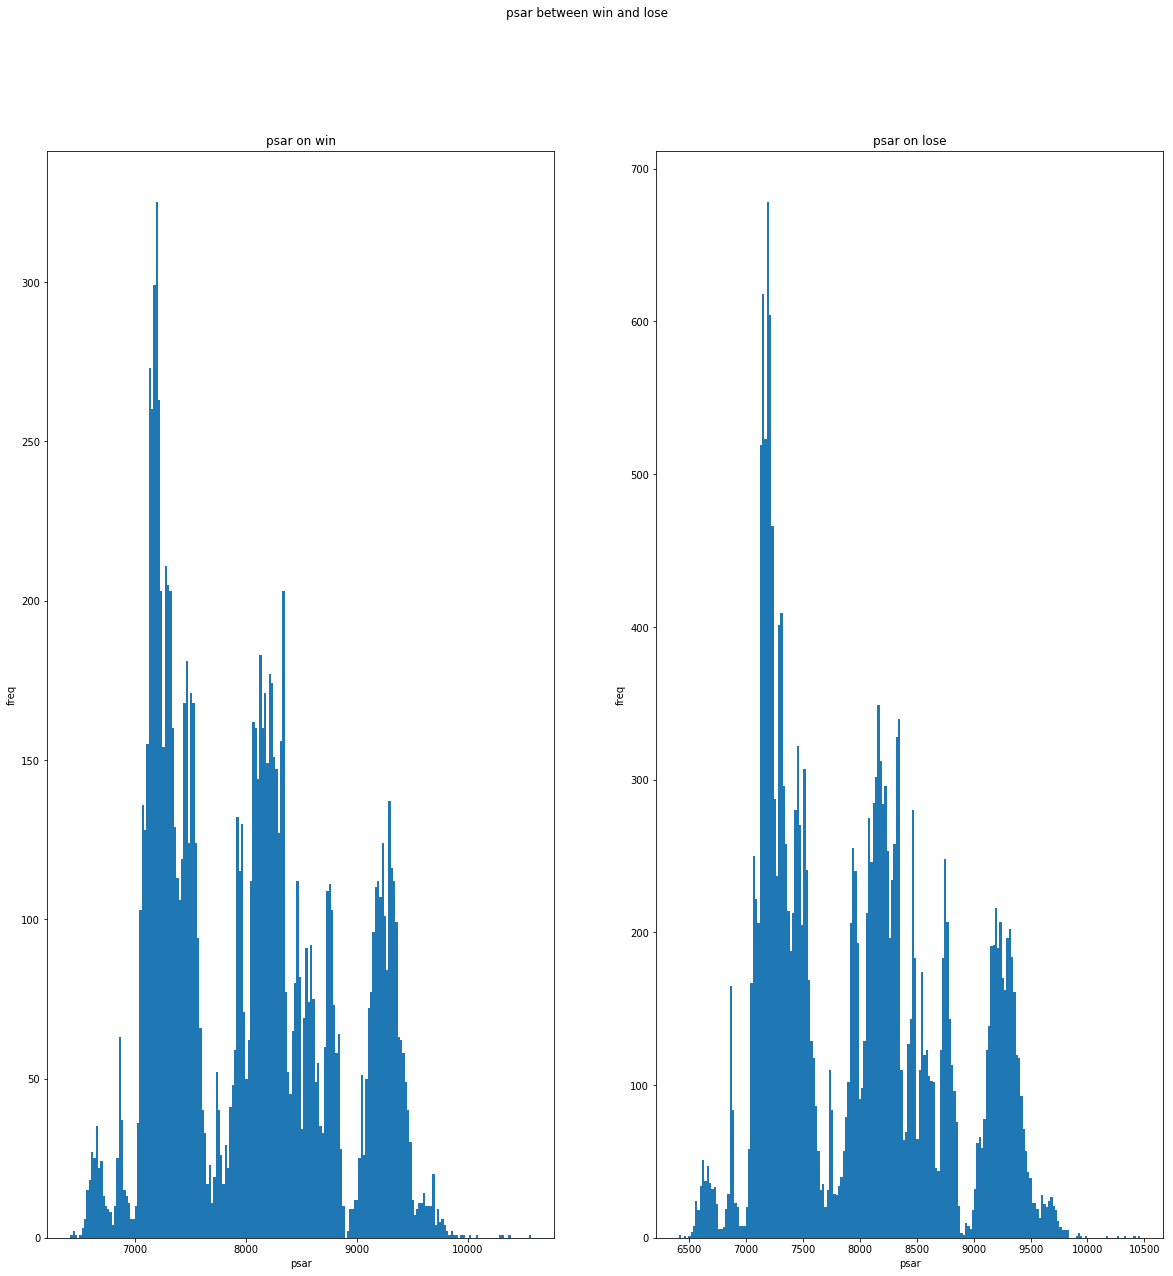

win psar mean => 8012.802167795142
lose psar mean => 7992.16113737444
win psar standard deviation => 769.2559050157098
lose psar standard deviation => 767.6509121971017
win psar median => 8036.7974184444665
lose psar median => 7982.719509648214


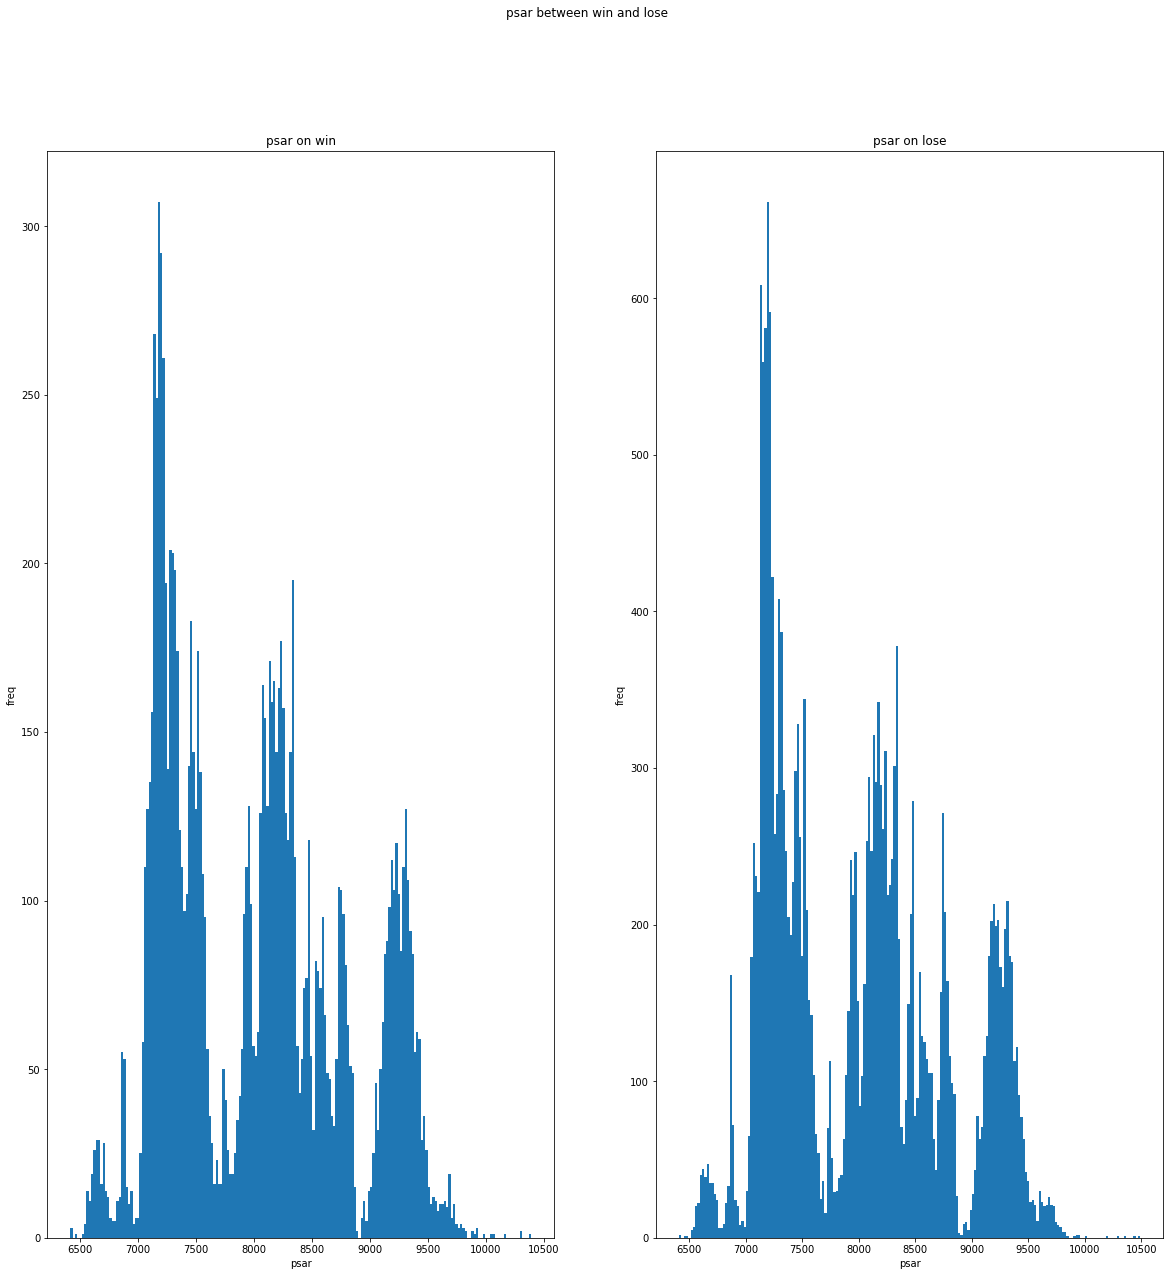

win psar mean => 8012.568139538173
lose psar mean => 7992.175034836565
win psar standard deviation => 768.8866333741129
lose psar standard deviation => 767.7034371605915
win psar median => 8035.209554610634
lose psar median => 7982.280478976001


In [6]:
create_hist(win_merged_close, lose_merged_close, "psar")
create_hist(win_merged_open, lose_merged_open, "psar")

### psar

#### close
標準偏差はどちらの場合も大きく、平均も大きな差があるようには見えない。

グラフからは大きく3つの山が存在していることが確認できる。
左から順々に小さくなっていることがわかる。
この3つの山は3種類の状態が存在することを意味しているのかもしれない。

[MT5のページ](https://www.metatrader5.com/ja/terminal/help/indicators/trend_indicators/psar)によるとpsarにはトレンド相場がブルであるかベアであるかを検出することができるそうだ。
そこから考えると、トレンド相場のうちのブル相場、ベア相場、レンジ相場がこの3つの山に対応していそうである。
しかしそれ以外の可能性として、3ヶ月の値動きの、それぞれの月の平均的な位置がこの3つの山の中心にあることが挙げられる。
また、もしその3つの相転移が存在するならば、負けトレードにもブル、ベア、レンジの3つの山ができるのは、ブル、ベアのトレンド相場に強いbotの特性からすると妙である。

PSARはジャンプを特徴としている。この値がジャンプした際にはトレンドの転換、すなわち相転移の発生を検出する。

uptrend、すなわちbullかとdowntrend、すなわちbearかはpsar_trendの値を見るとわかる。
ここでの問題はuptrendとdowntrendが2つの値しか取らないことである。
つまり原理的にPSARの返り値にはレンジ相場が存在しない。

ただPSARの返り値はbottom trend followのbotに対して相性が良さそうだ。
より具体的には取引回数、頻度をそこまで下げることなく勝率を向上させることができそうだ。

#### open
全く変化なし

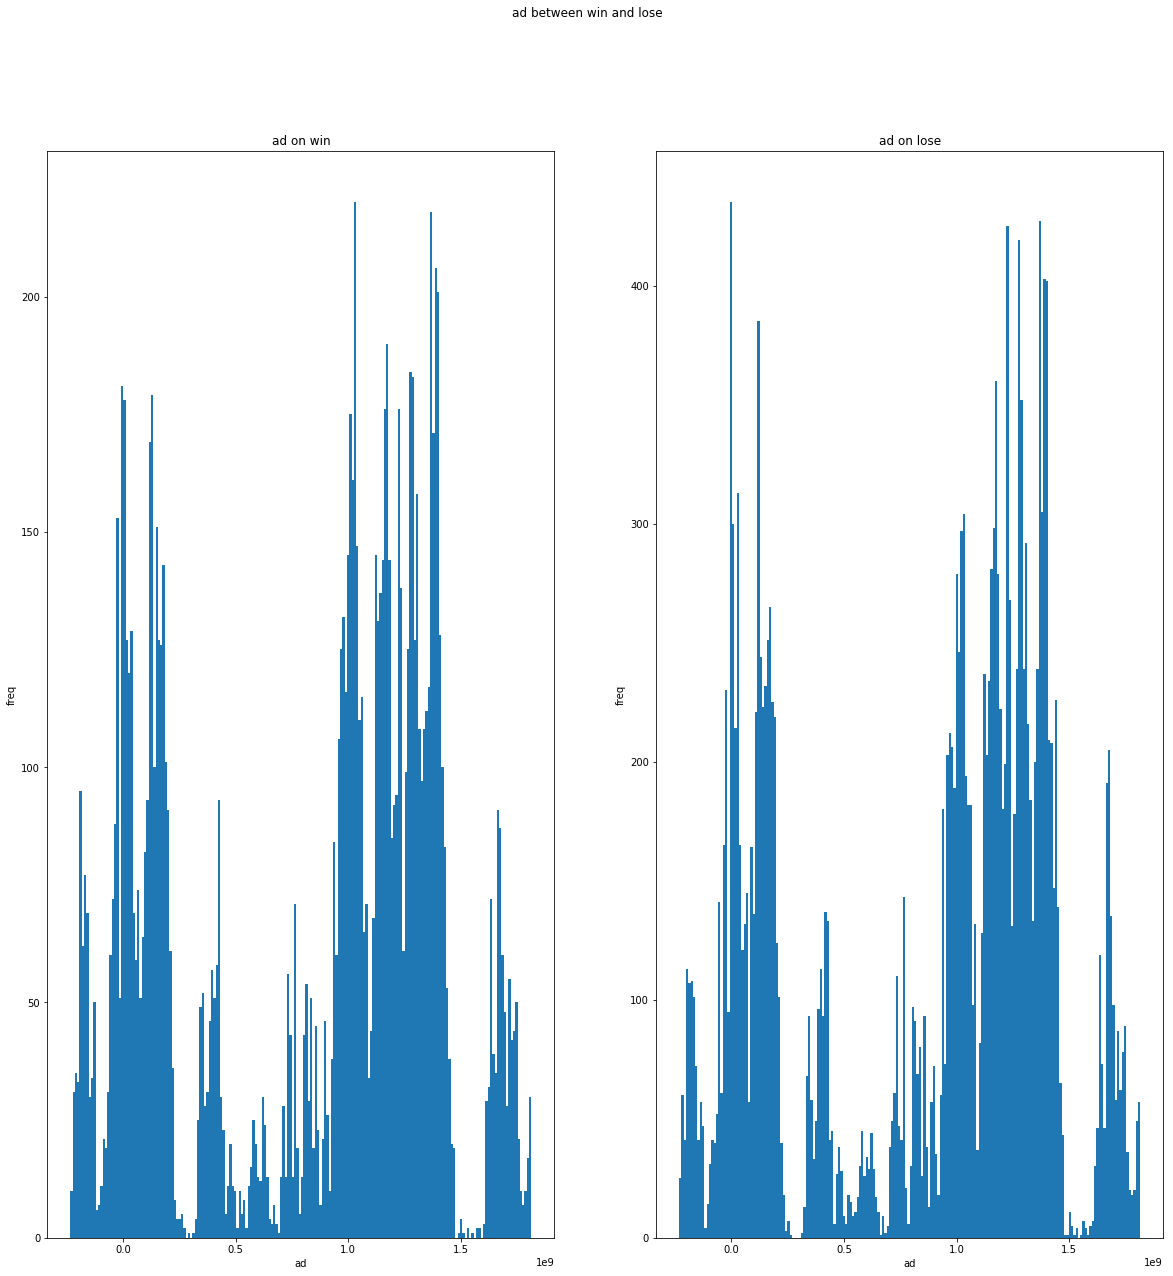

win ad mean => 822454458.1107068
lose ad mean => 844306287.0916272
win ad standard deviation => 573705321.0042756
lose ad standard deviation => 572351373.6609374
win ad median => 1022282875.05584
lose ad median => 1033520648.1601574


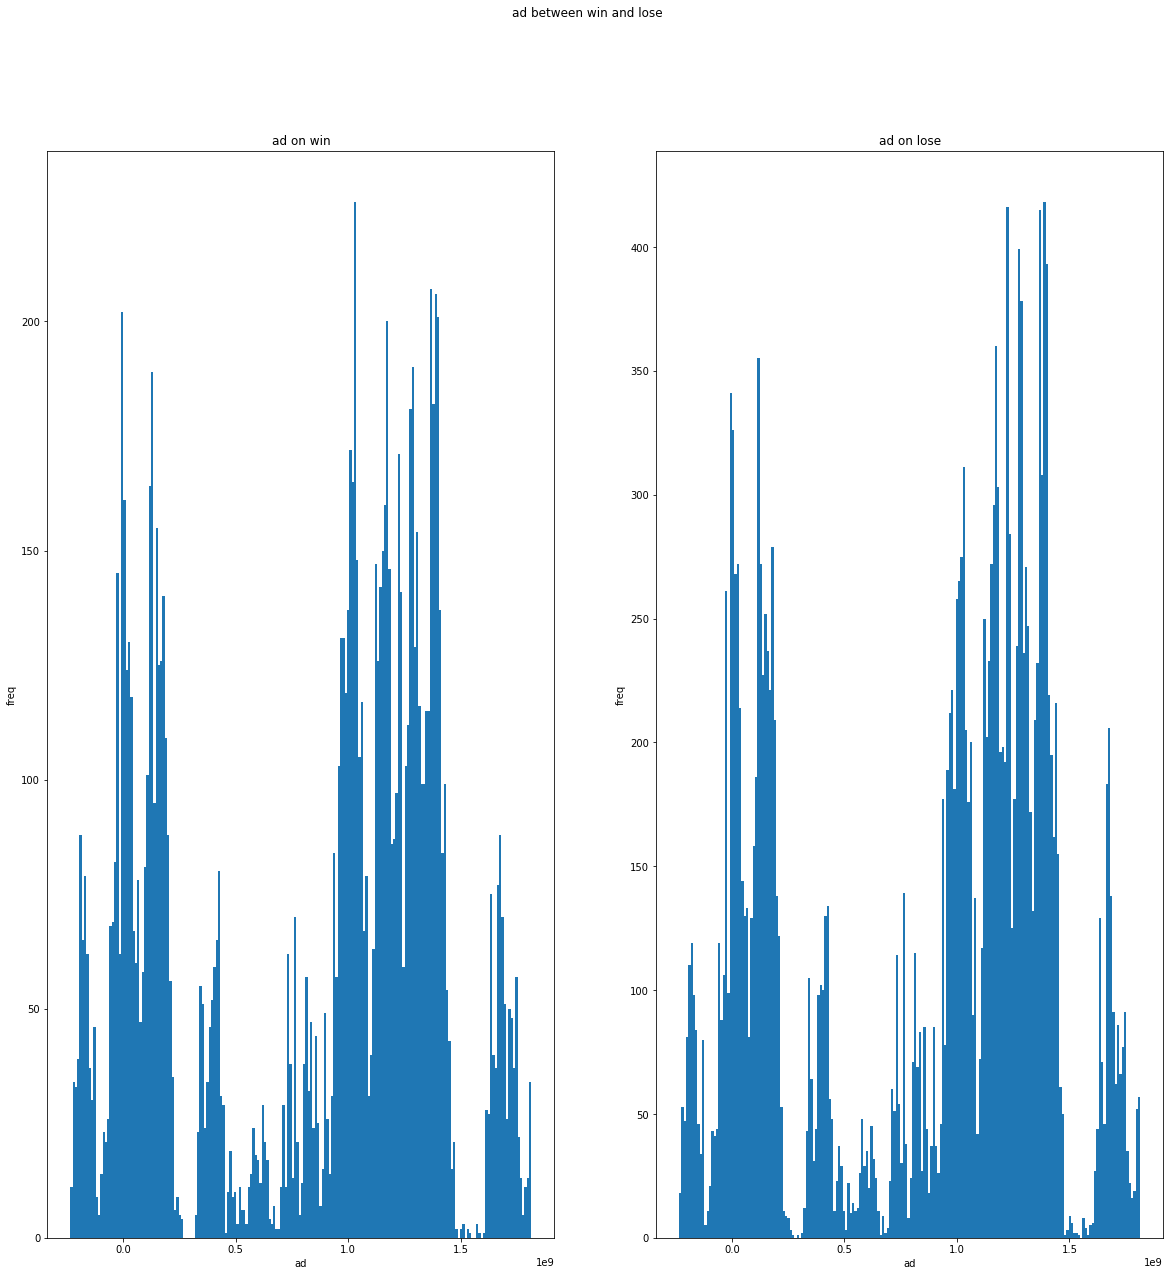

win ad mean => 822642498.1818091
lose ad mean => 844213555.8285348
win ad standard deviation => 573717766.0267421
lose ad standard deviation => 572333489.1184641
win ad median => 1022124587.6339014
lose ad median => 1033909908.9865179


In [7]:
create_hist(win_merged_close, lose_merged_close, "ad")
create_hist(win_merged_open, lose_merged_open, "ad")

### ad

#### close
標準偏差はどちらの場合も大きく、平均も大きな差があるようには見えない。

[このページ](https://xn--hck6a9a3a3cl0j7al2328j687d.com/?p=4932)がADラインの説明としてわかりやすい。
この指標はダイバージェンスを検出する指標として使われる。もっぱら逆張りの用途で使われるようだが、逆に言えばこのダイバージェンスが起きていないときはトレンド相場が続くと判断することが可能になる。

またbitcoinの価格の変動が大きいということはつまり安定していないということであり、安定していないならば値が上がるか下がるかのみである。
このグラフにはうっすらと2つの山が見えているが、これは値が上がるか下がるか、つまりブル相場かベア相場かの2種類の状態を表していると
推測することができる。

#### open
変化なし

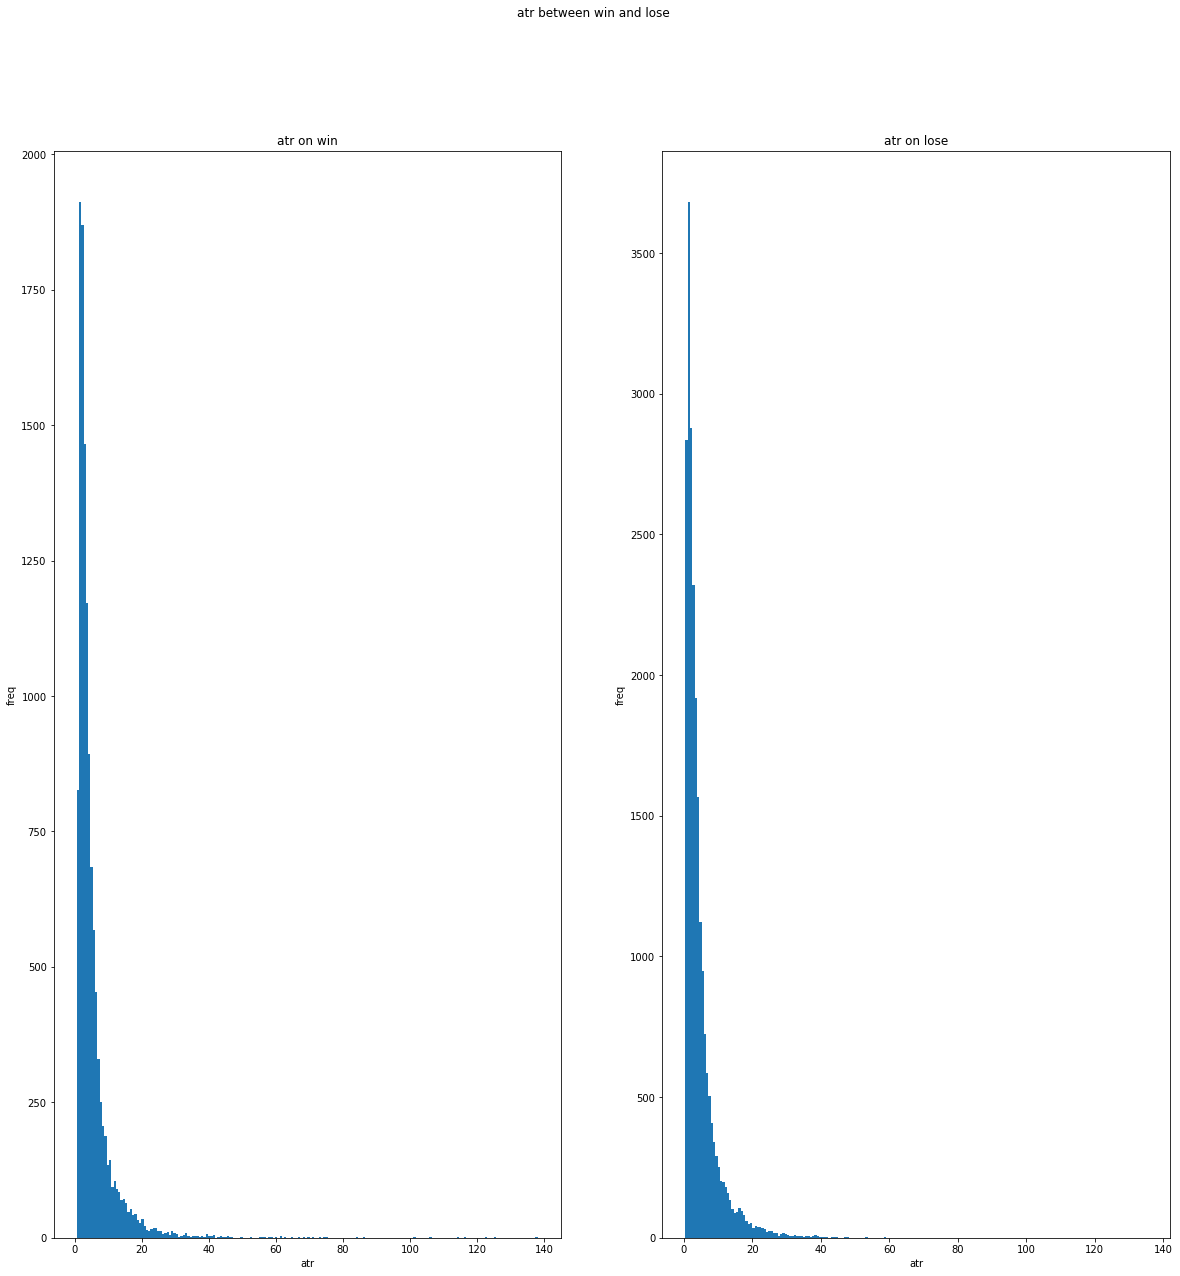

win atr mean => 5.155482334518938
lose atr mean => 4.743113965941551
win atr standard deviation => 6.404115136478503
lose atr standard deviation => 5.625422994804568
win atr median => 3.3216577587645384
lose atr median => 3.0322256407421757


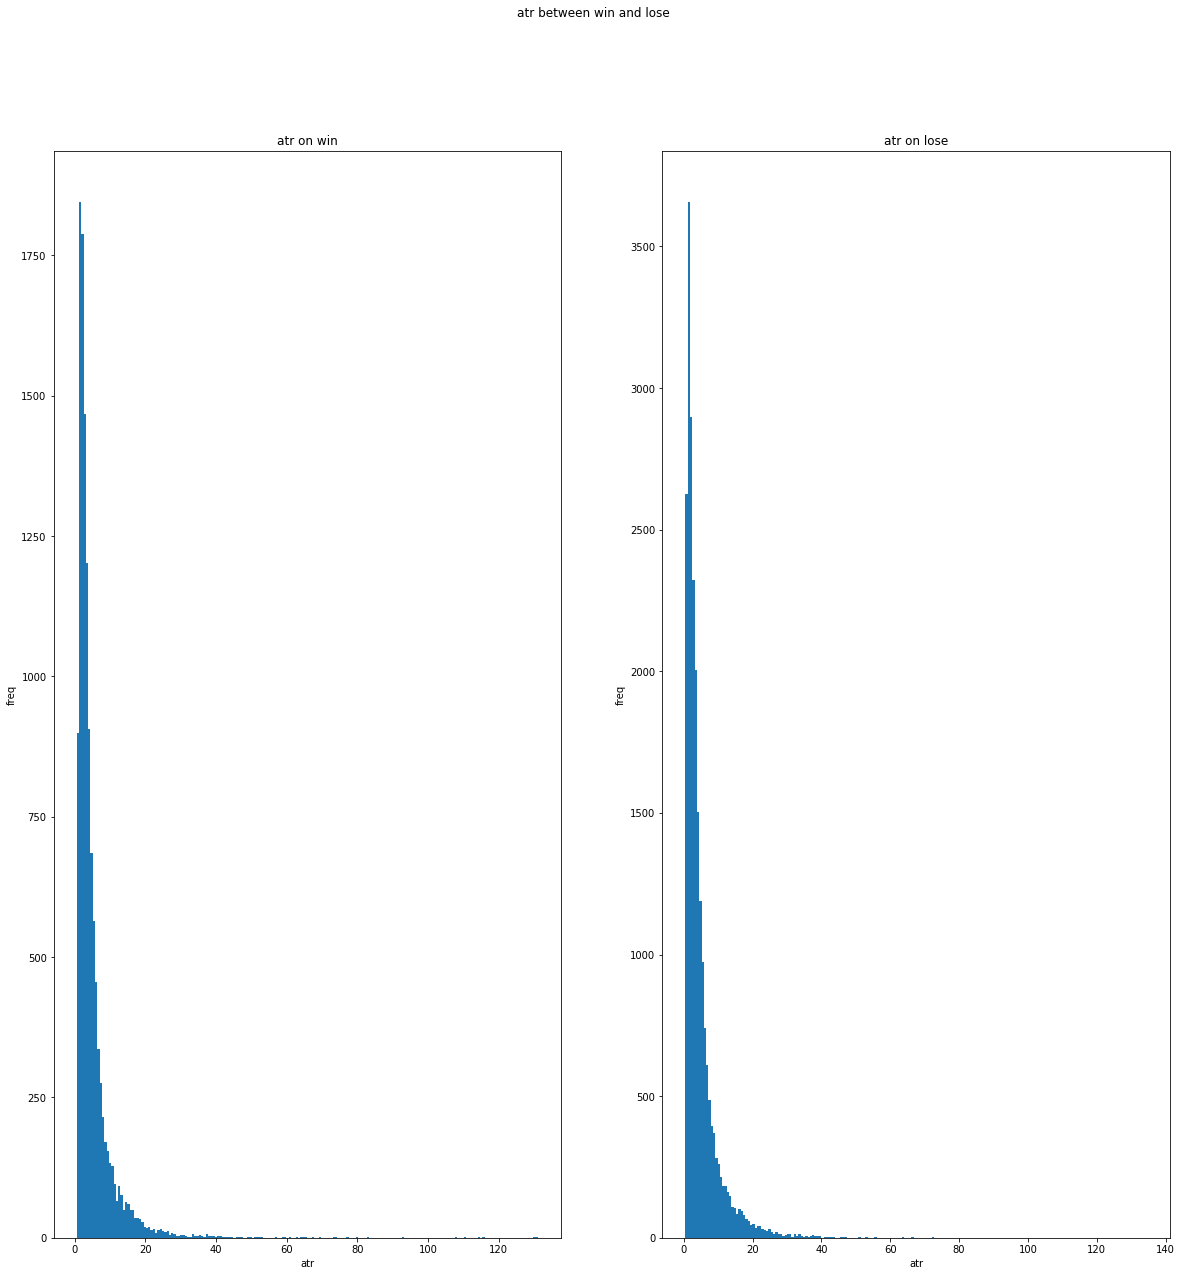

win atr mean => 4.872725194295794
lose atr mean => 4.8050420666036056
win atr standard deviation => 6.069383088535835
lose atr standard deviation => 5.6808639775080545
win atr median => 3.178467780192885
lose atr median => 3.0789053253347203


In [8]:
create_hist(win_merged_close, lose_merged_close, "atr")
create_hist(win_merged_open, lose_merged_open, "atr")

### ATR

#### close
標準偏差はどちらの場合も大きく、平均も大きな差があるようには見えない。

だがこの指標の特徴として高値-安値なので0以上の値のみしかとらないという点がある。
[ATRの説明はこちら](http://www.avatrade.co.jp/kojiro/13/)が詳しい。
ATRが増大している時はトレンド相場、ATRが縮小しているときはレンジ相場である。

それを鑑みると、勝ちトレードのATRが負けトレードのATRに比べて大きい傾向があることから、トレンドフォロー型botの特性を備えていると言える可能性がある。

#### close
変化なし

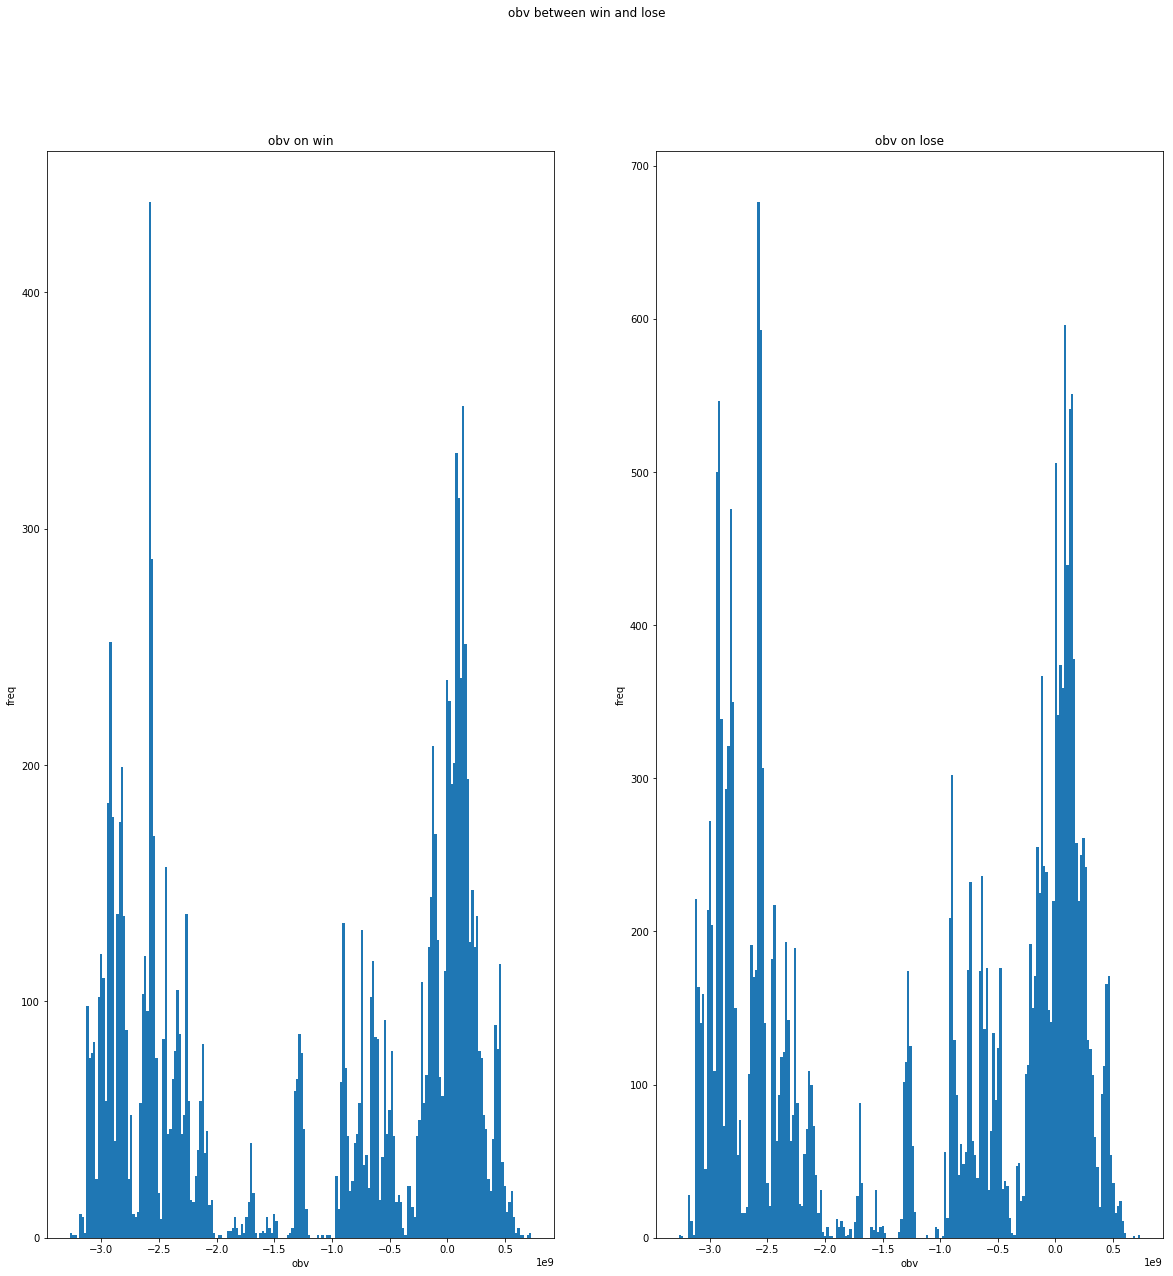

win obv mean => -1185643717.7523677
lose obv mean => -1232127982.584404
win obv standard deviation => 1286311360.3145623
lose obv standard deviation => 1295182557.4199584
win obv median => -735420796.5
lose obv median => -761149843.0


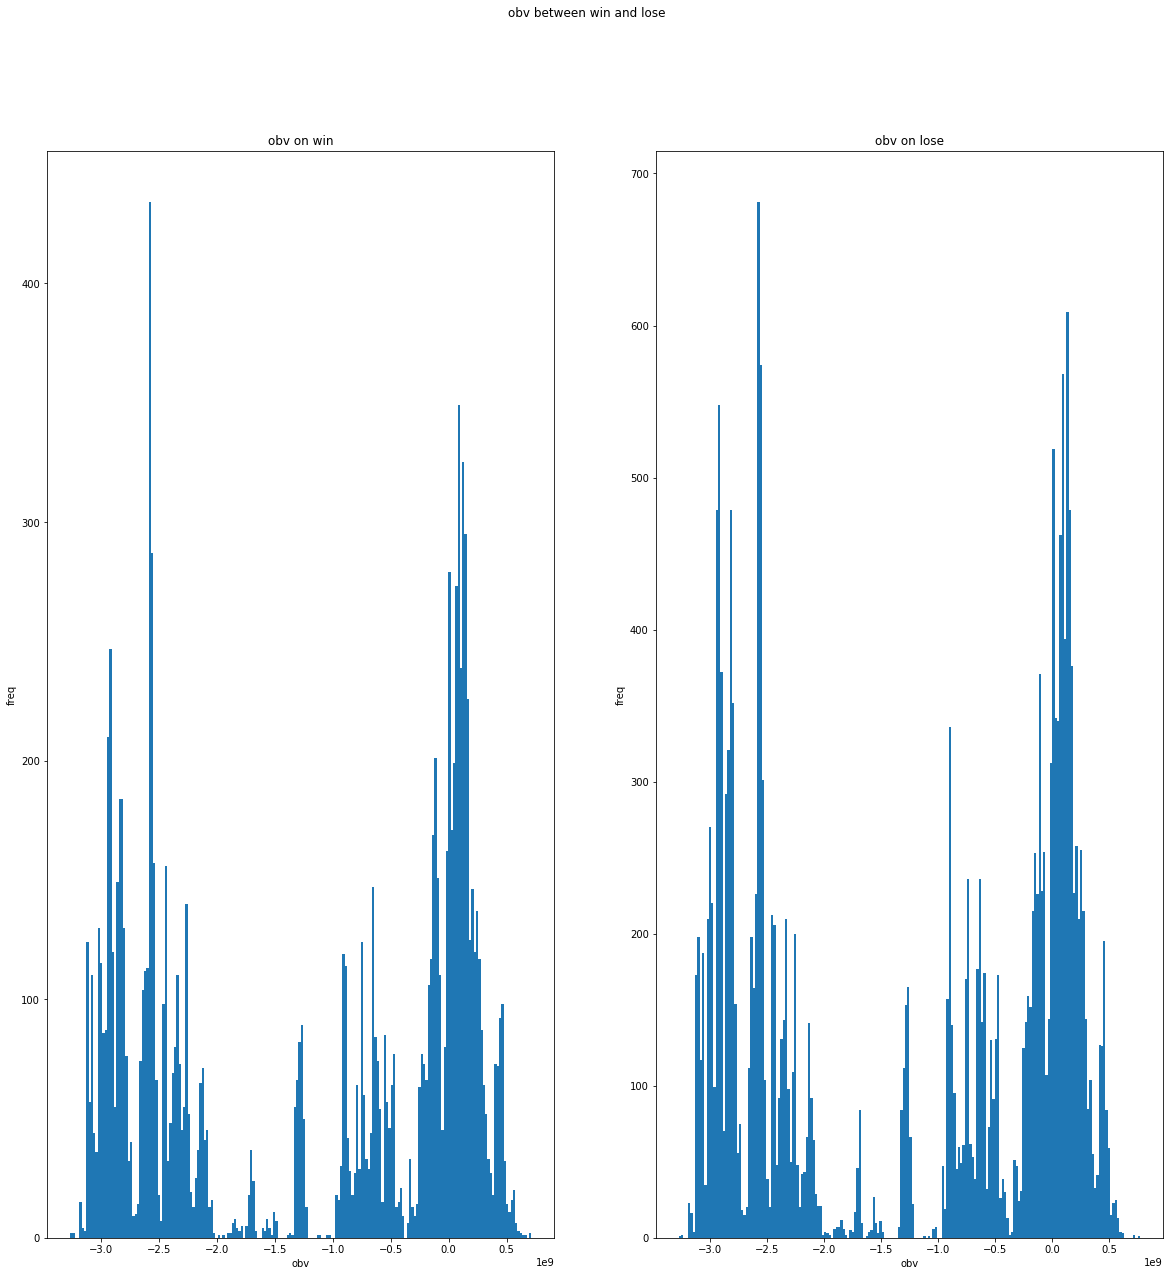

win obv mean => -1185193401.7077074
lose obv mean => -1232211460.4223092
win obv standard deviation => 1286226181.122154
lose obv standard deviation => 1295196152.410897
win obv median => -734350899.0
lose obv median => -761593592.0


In [9]:
create_hist(win_merged_close, lose_merged_close, "obv")
create_hist(win_merged_open, lose_merged_open, "obv")

### OBV
#### close
2つの群の間で明確な違いはなさそうである。
ノイズとみなして構わないだろう。

#### open
変化なし

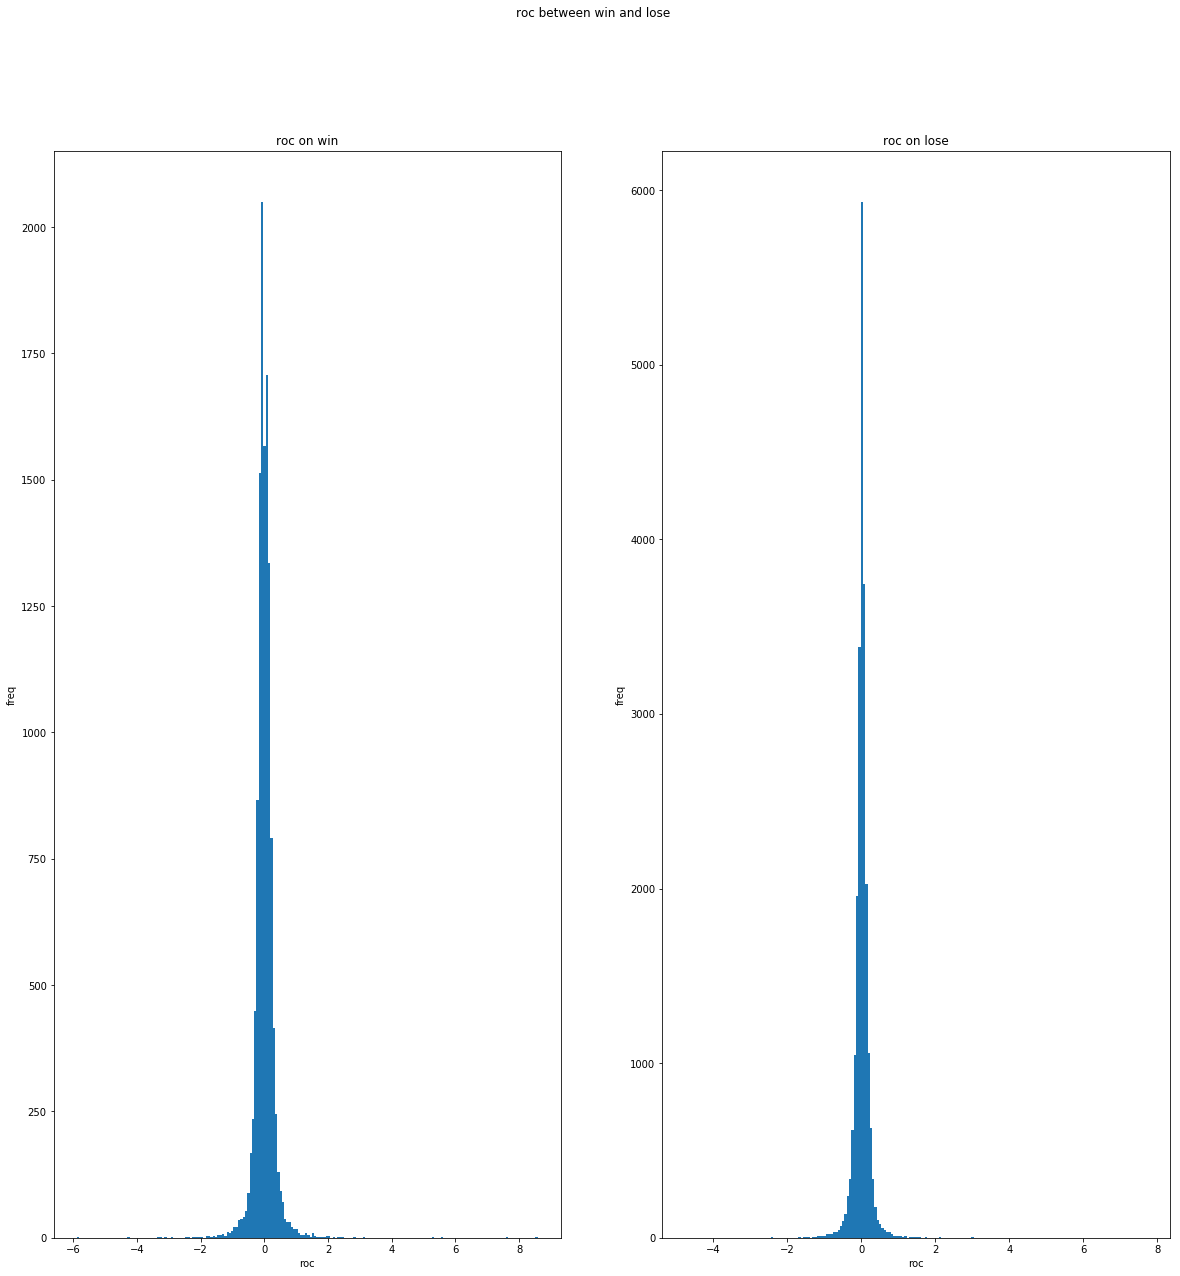

win roc mean => 0.0005041114426692778
lose roc mean => 0.009513161621219046
win roc standard deviation => 0.3207191735305536
lose roc standard deviation => 0.2201578565358761
win roc median => -0.012058362518208021
lose roc median => 0.01133144475919945
Kormogorov Smirnov test
KS     :0.13707269781849252
p-value:7.682041055559902e-130
p <= 0.05, These distribution have a difference
F-test
F:        2.122
p-value:  0.0
p <= 0.05, Unqual variance
t-test for unequal variance
t:        -2.773
p-value:  0.006
p < 0.05, The averages are different.


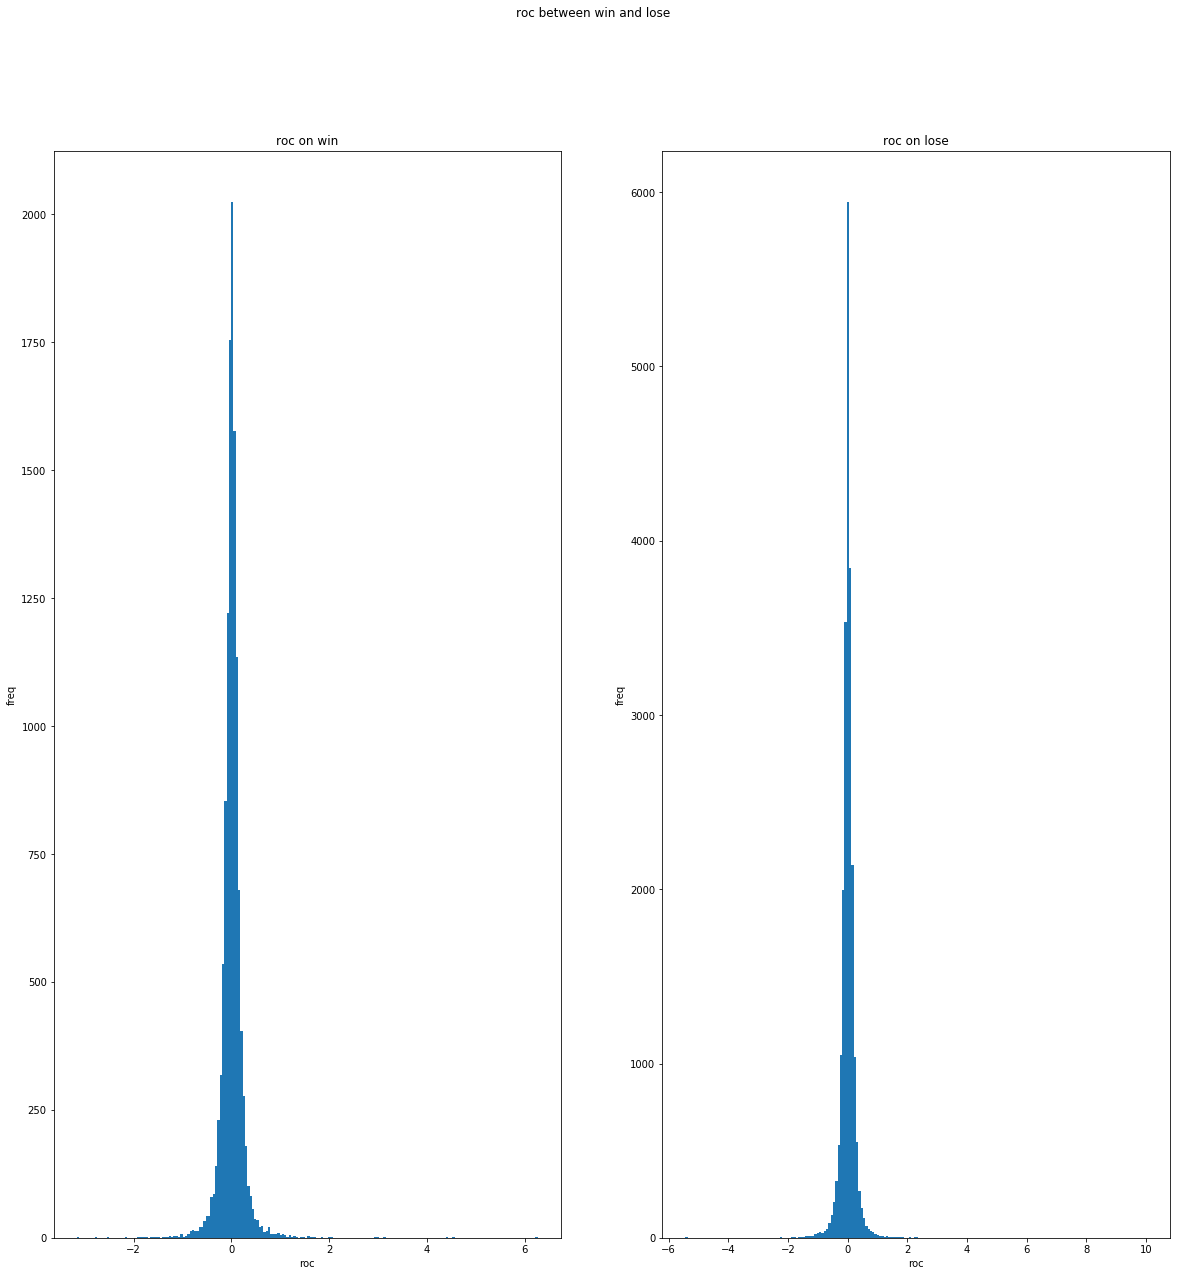

win roc mean => 0.011757446345396381
lose roc mean => 0.004593040593462969
win roc standard deviation => 0.2373926556540699
lose roc standard deviation => 0.2624161799921799
win roc median => 0.011485420247192568
lose roc median => 0.006688515818331631
Kormogorov Smirnov test
KS     :0.022174182181883828
p-value:0.0008209301944287488
p <= 0.05, These distribution have a difference
F-test
F:        0.818
p-value:  0.0
p <= 0.05, Unqual variance
t-test for unequal variance
t:        2.588
p-value:  0.01
p < 0.05, The averages are different.


In [10]:
create_hist(win_merged_close, lose_merged_close, "roc")
rk.f_and_t_test(win_merged_close["roc"], lose_merged_close["roc"])

create_hist(win_merged_open, lose_merged_open, "roc")
rk.f_and_t_test(win_merged_open["roc"], lose_merged_open["roc"])

### ROC
#### close
ROCの大きさには明確な違いがある。
勝っているときの平均値は負けているときの平均値に比べるととても低い値になっている

#### open
テストの結果が変わったが依然として傾向に変化はなさそうである。

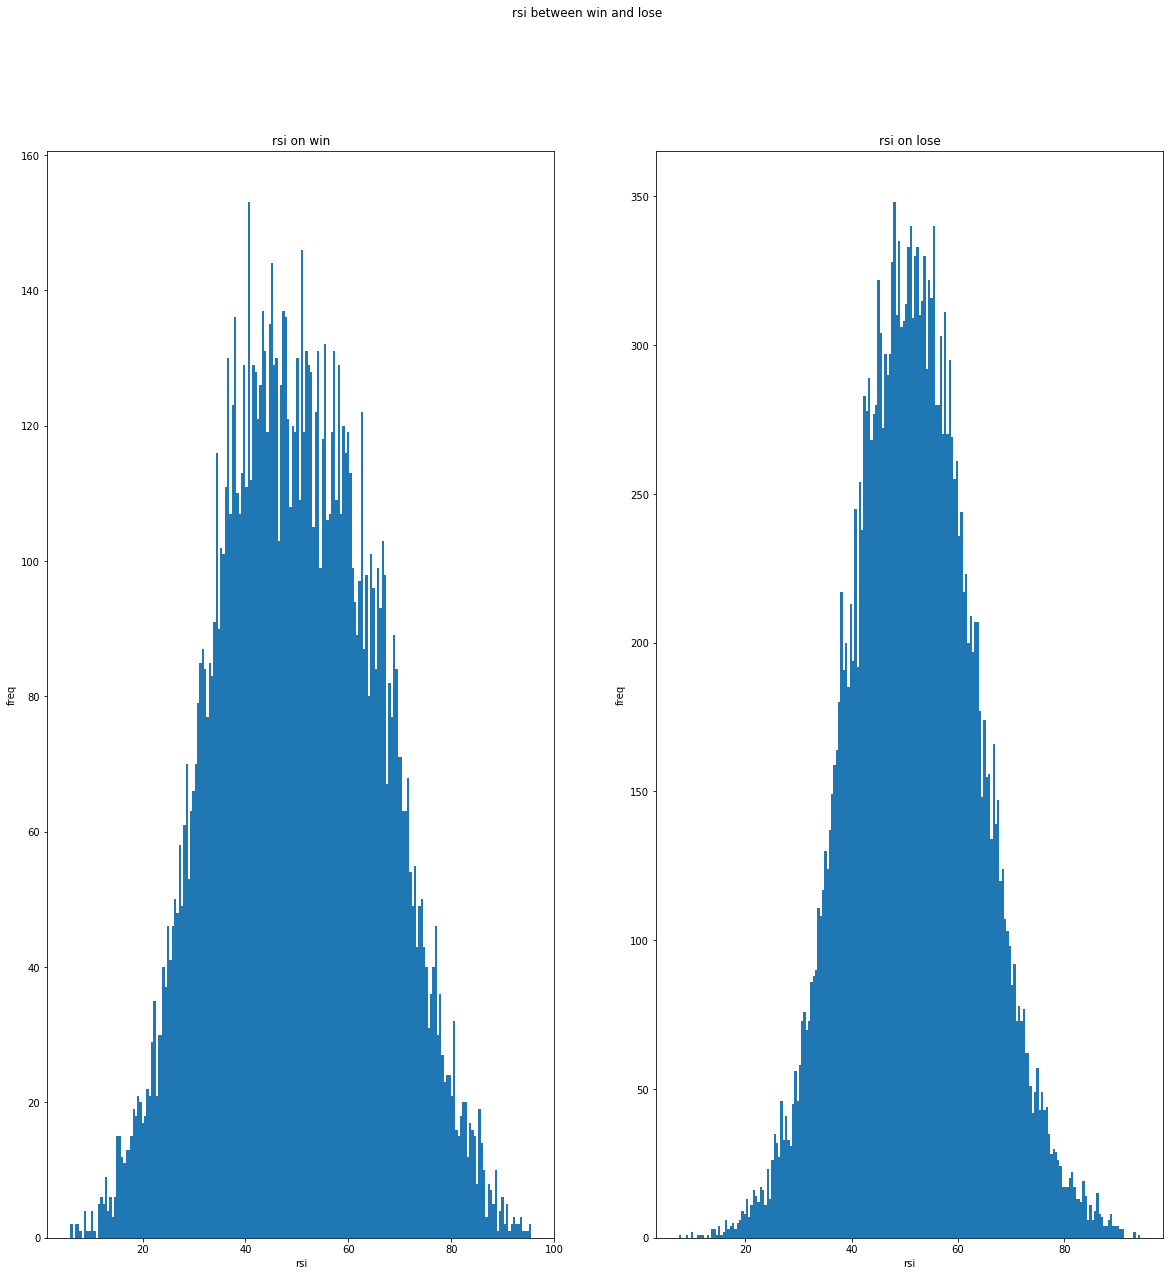

win rsi mean => 50.075056049188575
lose rsi mean => 51.69168354826143
win rsi standard deviation => 15.397441223395171
lose rsi standard deviation => 11.877970051781483
win rsi median => 49.64365419361212
lose rsi median => 51.441909917262365
Kormogorov Smirnov test
KS     :0.11816482320662763
p-value:1.337521830081511e-96
p <= 0.05, These distribution have a difference
F-test
F:        1.68
p-value:  0.0
p <= 0.05, Unqual variance
t-test for unequal variance
t:        -10.098
p-value:  0.0
p < 0.05, The averages are different.


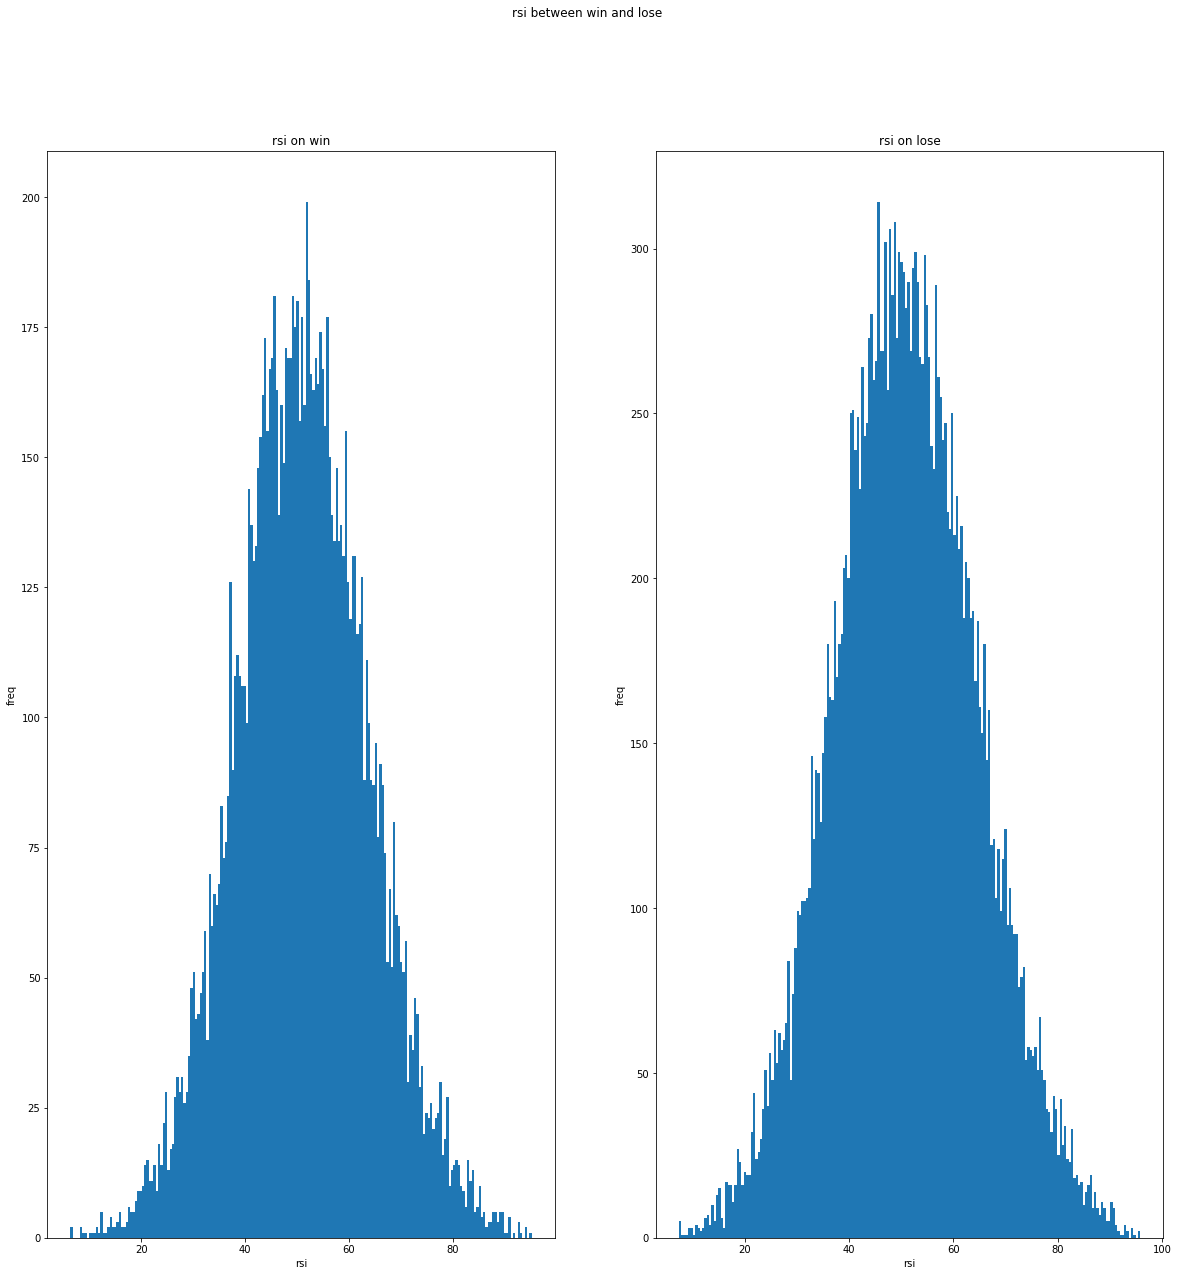

win rsi mean => 51.13866550349197
lose rsi mean => 50.94993856414248
win rsi standard deviation => 12.699792856502908
lose rsi standard deviation => 13.646441347444203
win rsi median => 50.94477212330304
lose rsi median => 50.682533521766906
Kormogorov Smirnov test
KS     :0.027682874007133595
p-value:1.0533531665596689e-05
p <= 0.05, These distribution have a difference
F-test
F:        0.866
p-value:  0.0
p <= 0.05, Unqual variance
t-test for unequal variance
t:        1.289
p-value:  0.198
p > 0.05, The averages are not different.


In [11]:
create_hist(win_merged_close, lose_merged_close, "rsi")
rk.f_and_t_test(win_merged_close["rsi"], lose_merged_close["rsi"])

create_hist(win_merged_open, lose_merged_open, "rsi")
rk.f_and_t_test(win_merged_open["rsi"], lose_merged_open["rsi"])

### RSI Summary
#### close
こちらにも明確な違いがあるが、もっとも大きな違いは裾野の大きさである。
勝っているときの方がRSIの標準偏差が大きい傾向にある。

#### open
t検定の結果が変わったがKS検定で同一の分布ではないことがわかっているのでこの結果に特段意味はなさそうである。

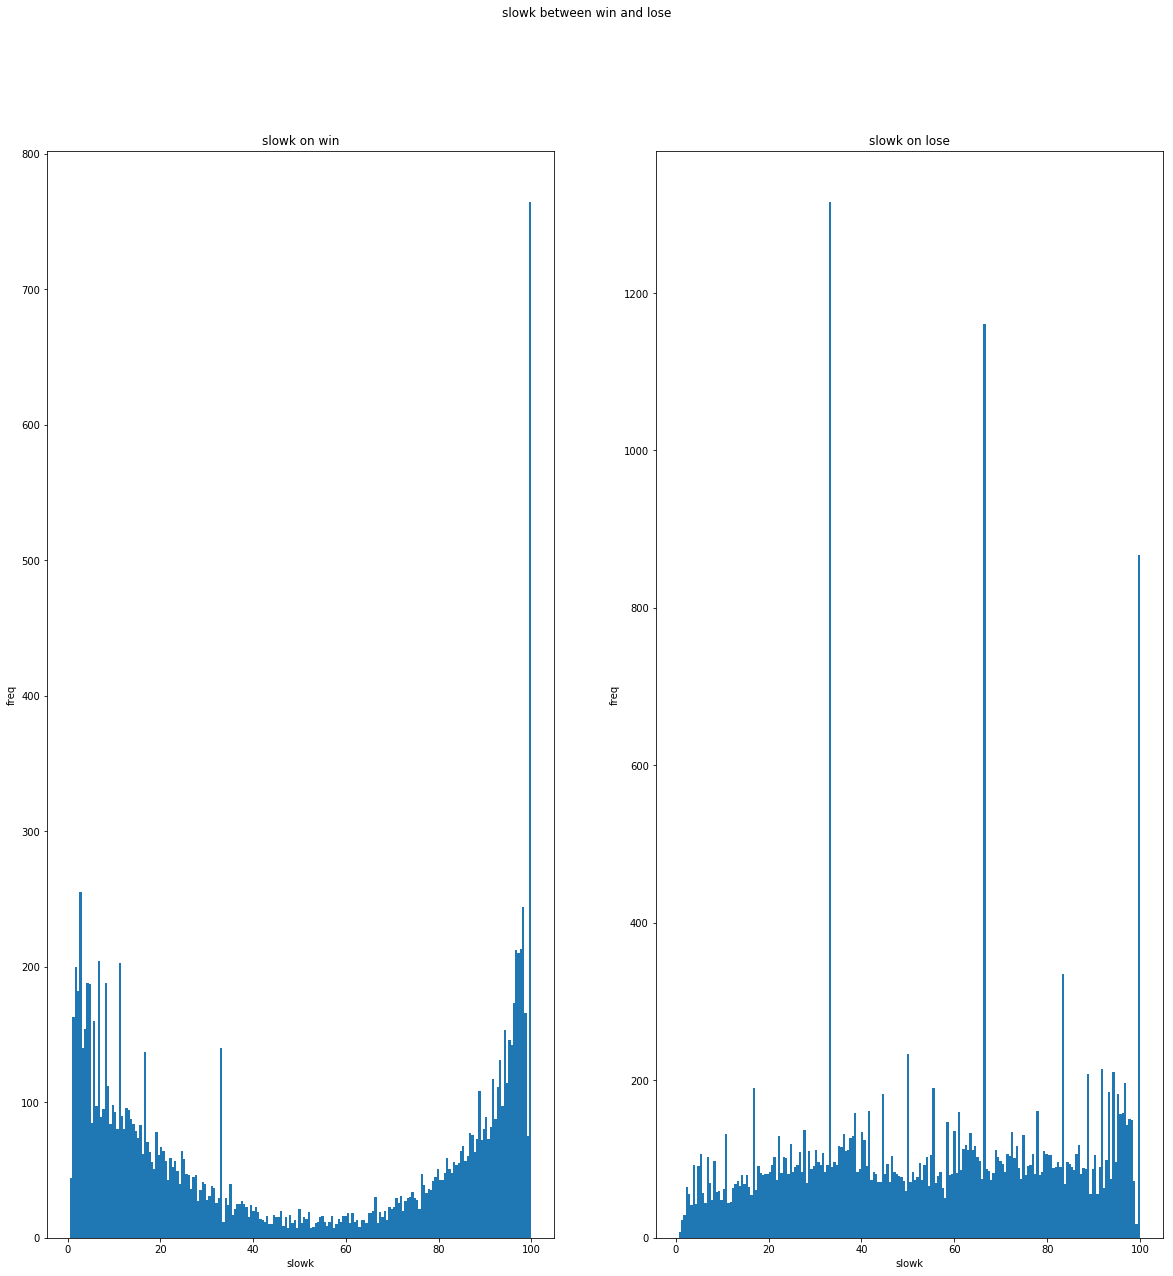

win slowk mean => 50.45061887503254
lose slowk mean => 55.463688509025594
win slowk standard deviation => 38.40166825399077
lose slowk standard deviation => 27.826467735518737
win slowk median => 41.56388427463738
lose slowk median => 56.74603174603115


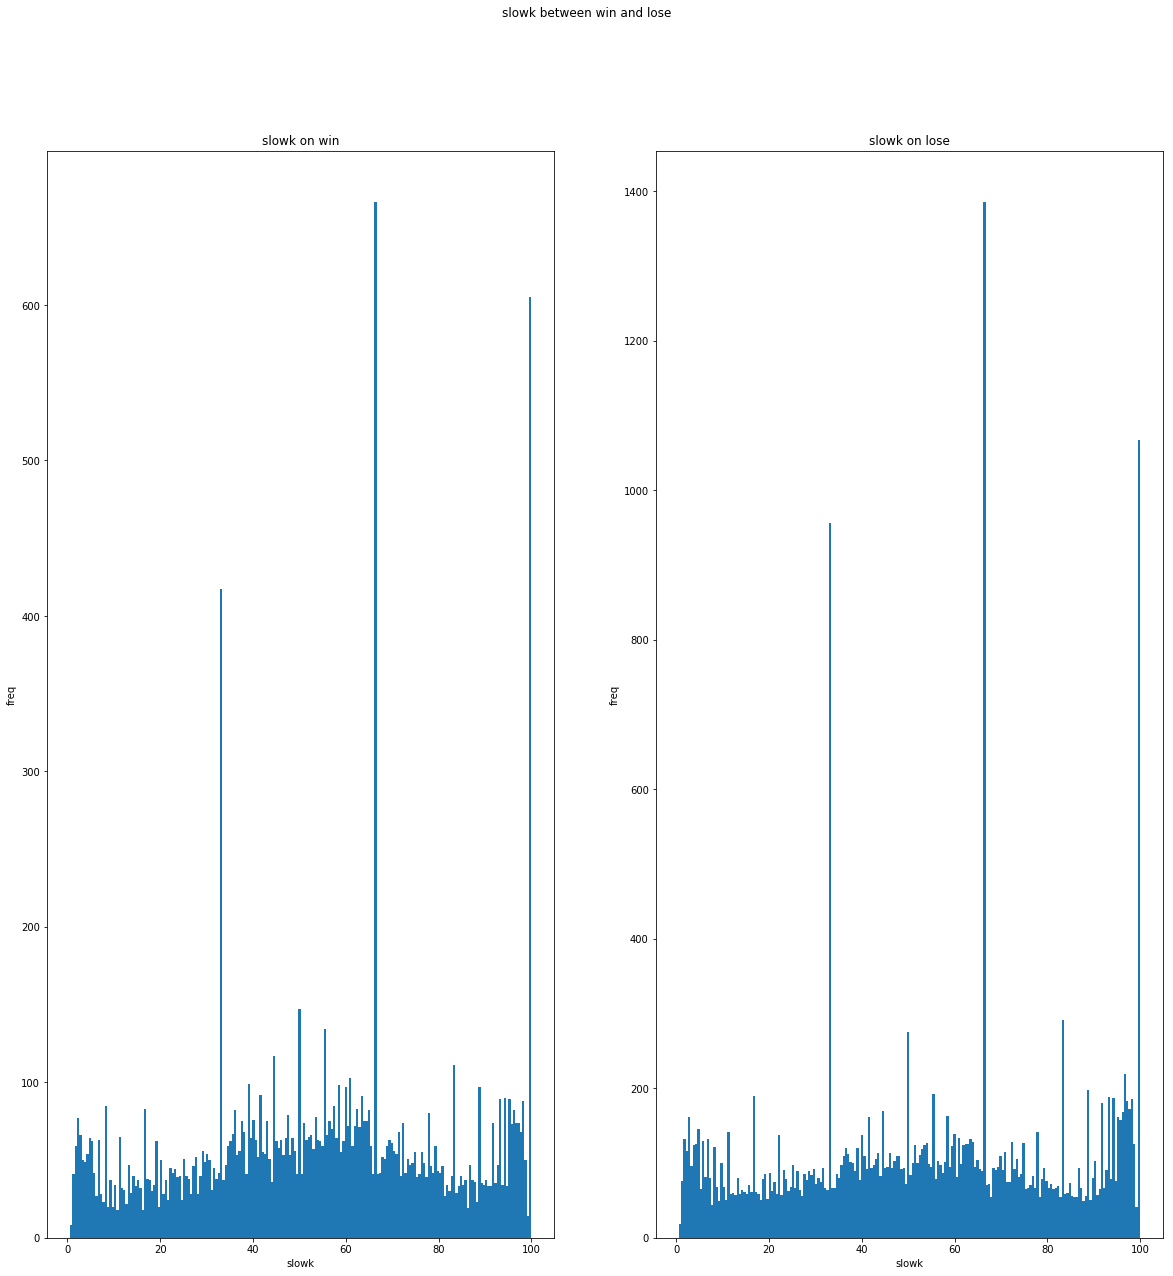

win slowk mean => 54.77168823781053
lose slowk mean => 54.663229001766645
win slowk standard deviation => 27.550687759678258
lose slowk standard deviation => 28.80537155805972
win slowk median => 56.14035087718973
lose slowk median => 55.92171294747254


In [12]:
create_hist(win_merged_close, lose_merged_close, "slowk")
create_hist(win_merged_open, lose_merged_open, "slowk")

### Slowk Summary

#### close
こちらには分布に明確な違いがある。
勝ちトレードのslowkはアンテナ状の分布をしており、負けトレードのslowkは平坦な値である。
ここから察すると、slowkの50からの差の絶対値が大きい場合に多く賭けることによって、botの収益性を向上させることができそうである。
また際立った0の扱いだが、これは勝っているときの標本数が750程度、負けているときの標本数が830程度と、その勝率から考えると、
0の場合でも上と同様に多めに賭けることで収益性は改善する。

掛率の調整の重要なしきい値としては、ある階級について勝ちトレードと負けトレードの数を合算しこれを分母、
勝ちトレードの数を分子として、ある階級についての勝ちの比率を計算する。
これを勝率で割ってやると、勝ちの比率が逆転するポイントを基準とした値が計算できる。
この指標の大きさに応じて掛率を変更することで収益性を改善することができる。

この指標は50より大きい場合と小さい場合についてそれぞれ計算する。
なぜならもしこれが対称的だとするならば、100の標本数と同程度0に標本数が集まる必要があるが、それが観測できないからである。

また、ところどころスパイクしている箇所については個別に切り分けて対応する必要があるだろう。

#### open
変化なし

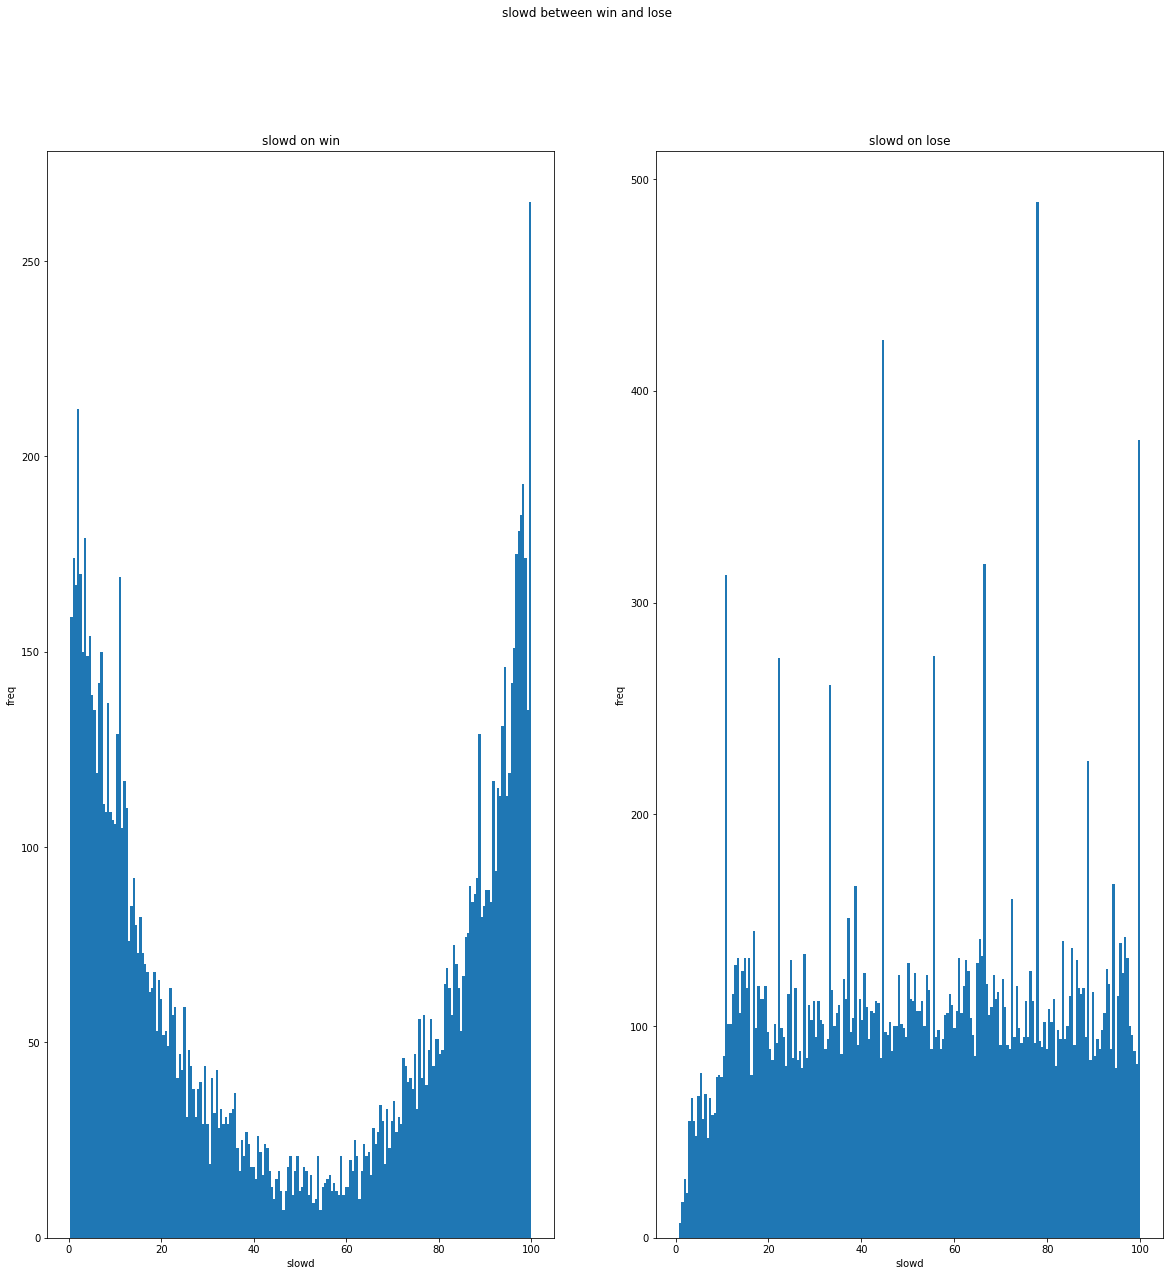

win slowd mean => 49.068393260903896
lose slowd mean => 53.220056275148714
win slowd standard deviation => 37.56020925670107
lose slowd standard deviation => 27.571476025216878
win slowd median => 42.4247379402599
lose slowd median => 53.719045556276534


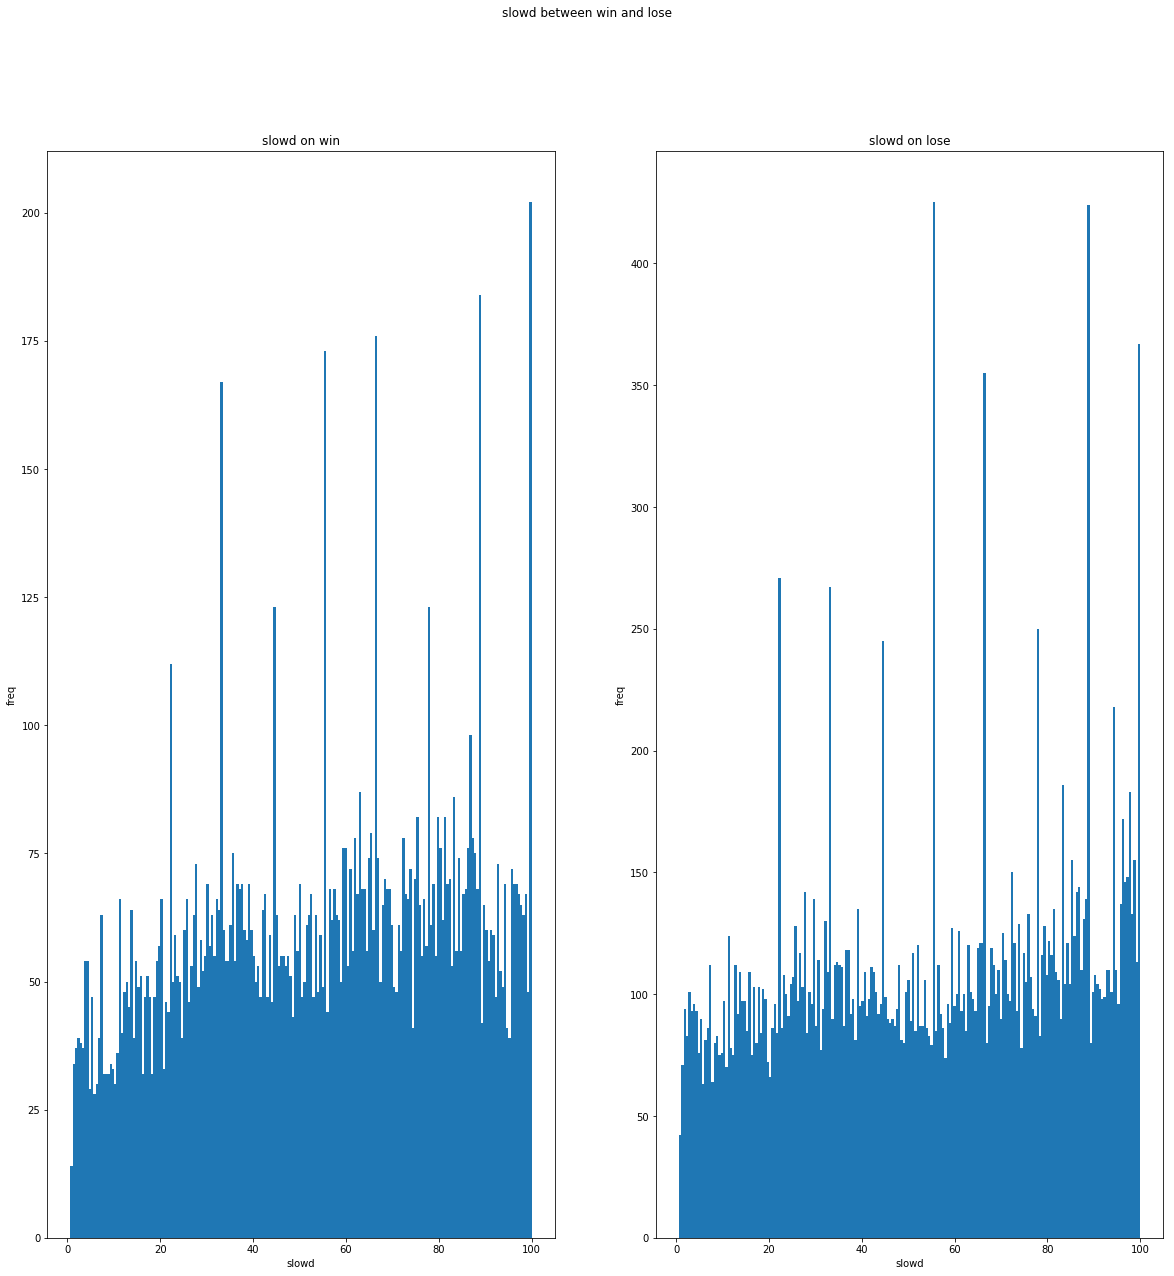

win slowd mean => 54.70975998052253
lose slowd mean => 54.34694210744597
win slowd standard deviation => 27.546008174812066
lose slowd standard deviation => 28.704647912605985
win slowd median => 56.29629629629426
lose slowd median => 55.555555555554086


In [13]:
create_hist(win_merged_close, lose_merged_close, "slowd")
create_hist(win_merged_open, lose_merged_open, "slowd")

### Slowd Summary
#### close
こちらにもslowkと同様の形状が観測される。
これをslowkと共に予測に用いる際は多重共線性に注意する必要がありそうである。

slowkと違ってこちらは0にも100と同程度と言えなくもない数の標本が存在している。
slowkよりも対称性の度合いとしてこちらの方が高そうである。
これを定量的に測る方法があればぜひ知りたいものである。
またこちらの方が、勝っているときのアンテナ状になっている部分の傾きが大きいようであるが、
これはslowkの100の値が多すぎるためにそう見えている可能性があるので、結論を得るためにはslowk=100を除去した形状を比較する必要がある。

負けトレードにはslowkよりも多くのスパイクが記録されている。
slowk, slowdのスパイクは50を中心に線対称していそうであり、指標の特性があるように見える。
またこの中でslowd=0の負けトレードの数が顕著に少ないことが見て取れる。
slowd=0のときには大きく賭けるようにすることでbotの収益性を改善することができる可能性がある。

#### open
変化なし

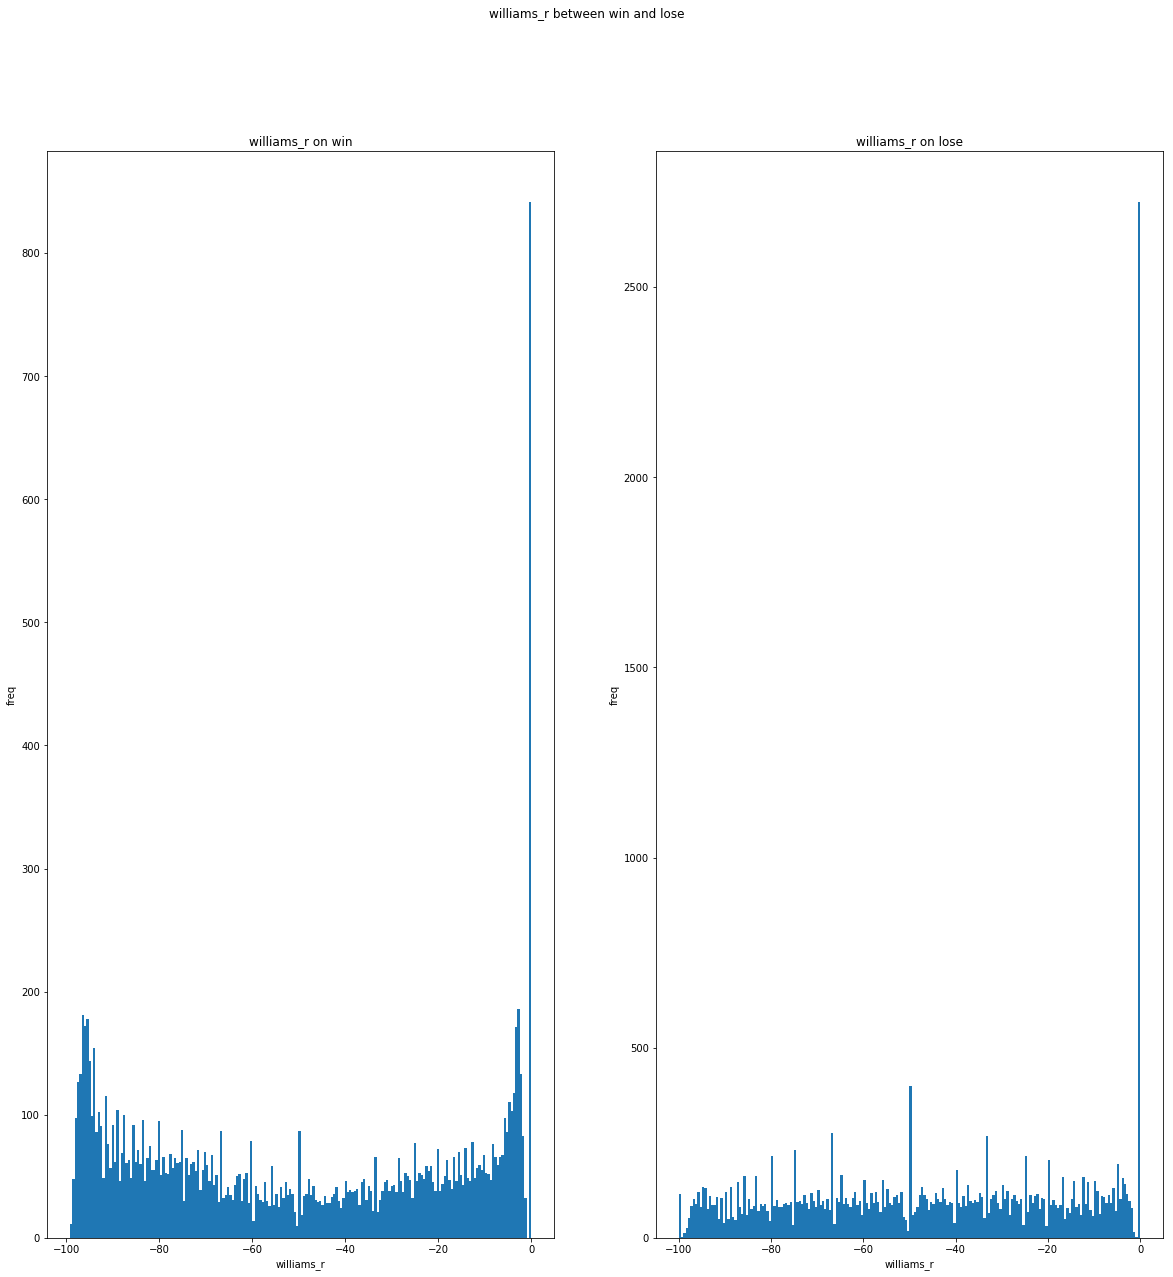

win williams_r mean => -49.22949869628965
lose williams_r mean => -43.12145268237087
win williams_r standard deviation => 34.1884776691274
lose williams_r standard deviation => 30.697263279136898
win williams_r median => -51.28205128205128
lose williams_r median => -42.30769230769231


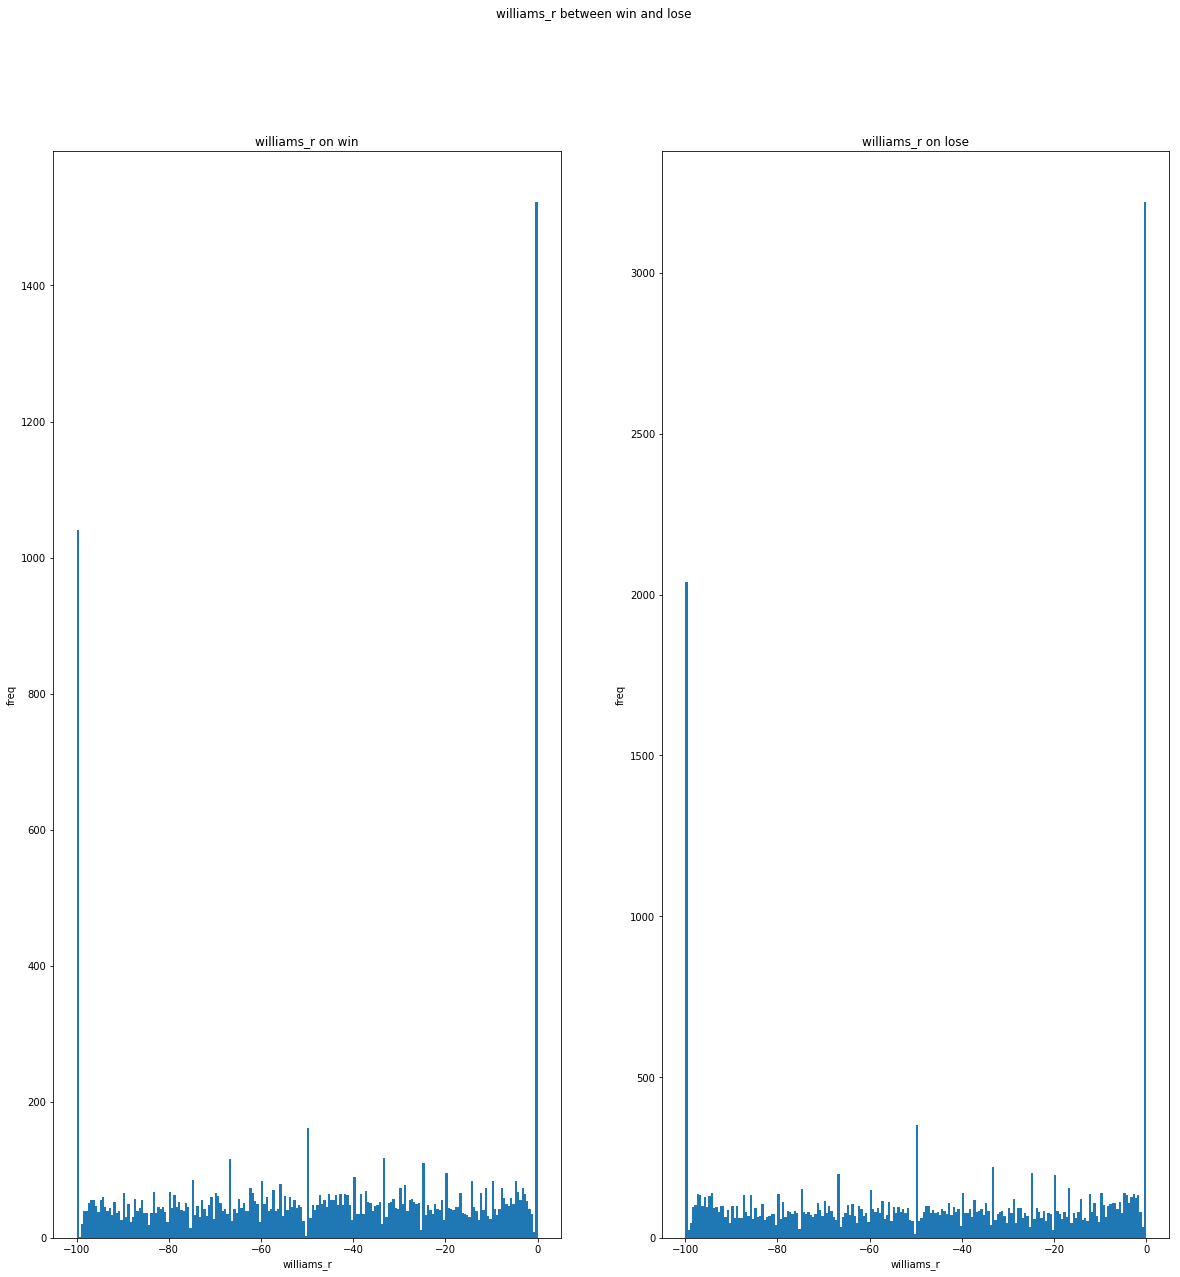

win williams_r mean => -46.757707109819265
lose williams_r mean => -46.910624668292044
win williams_r standard deviation => 33.600670741066295
lose williams_r standard deviation => 35.03027680646062
win williams_r median => -45.45454545454545
lose williams_r median => -46.05263157894737


In [14]:
create_hist(win_merged_close, lose_merged_close, "williams_r")
create_hist(win_merged_open, lose_merged_open, "williams_r")

### Wiiliams R Summary
#### close
こちらは値の50からの距離に応じて勝ちの比率が上昇している。
ただし0の場合の勝率はこのbotの全体の勝率とほとんど同じである。
また負けトレードの数は中心から線対称に、外側に向かうにつれて減少傾向にあるのに対し、
勝ちトレードの場合はその減少傾向が比較的薄いことがわかる。
全体での平均的な勝率を横線に引き、それぞれの階級の勝ちトレードの比率を確認するグラフを書いてみるのも一興だろう。

#### open
変化なし

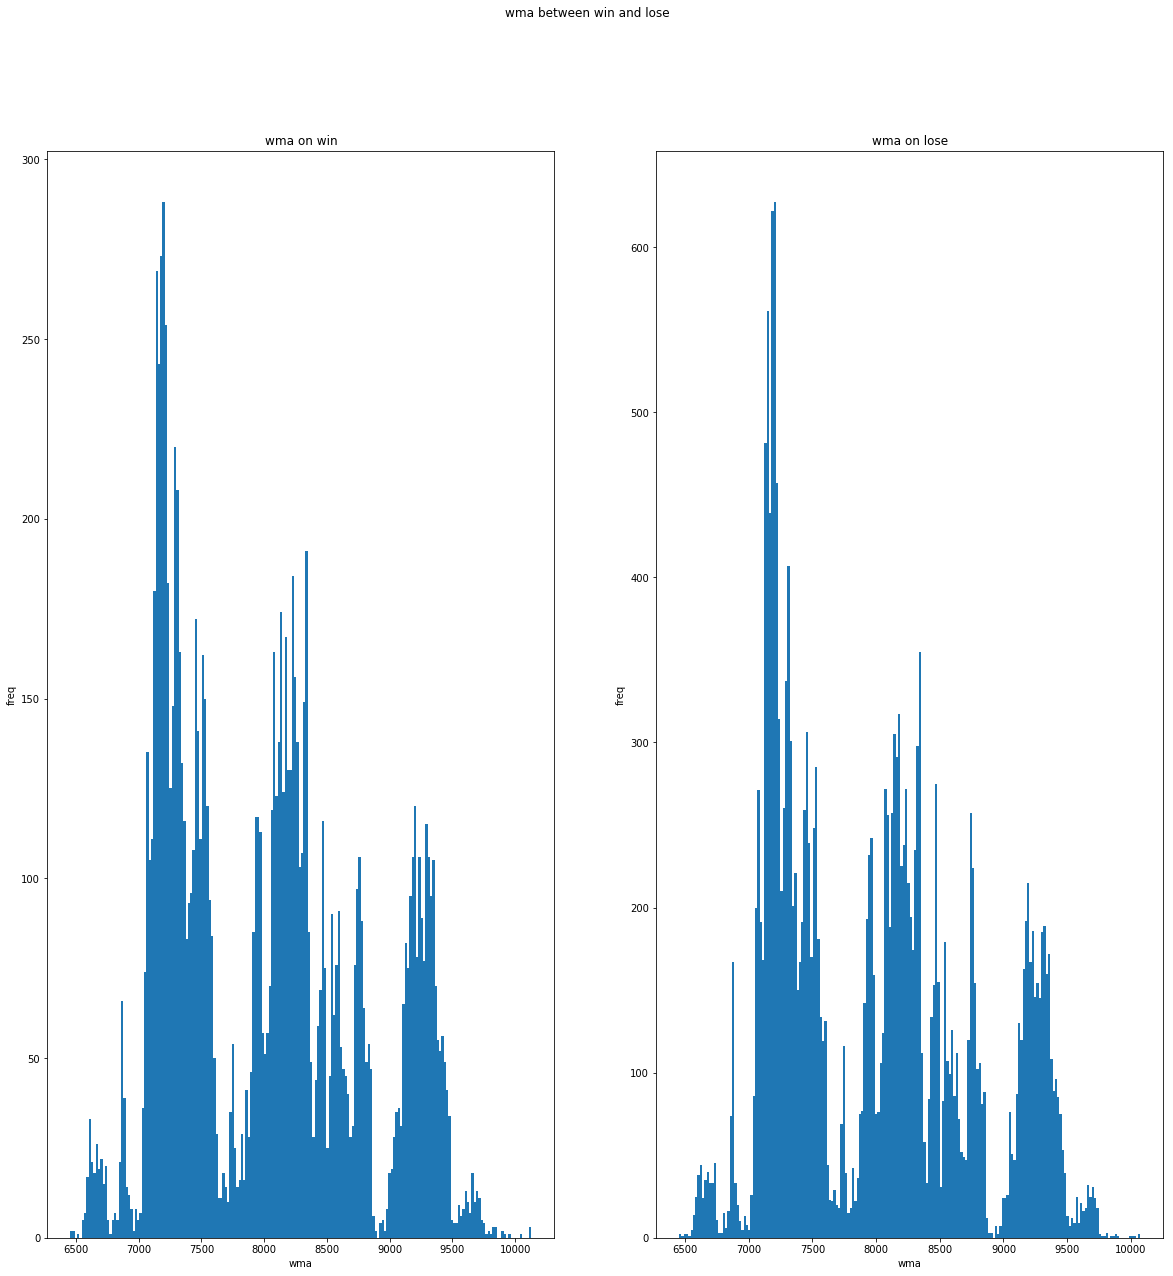

win wma mean => 8012.515424594244
lose wma mean => 7992.755279898286
win wma standard deviation => 768.3469868240627
lose wma standard deviation => 767.1993713952977
win wma median => 8034.050537634409
lose wma median => 7980.5236559139785


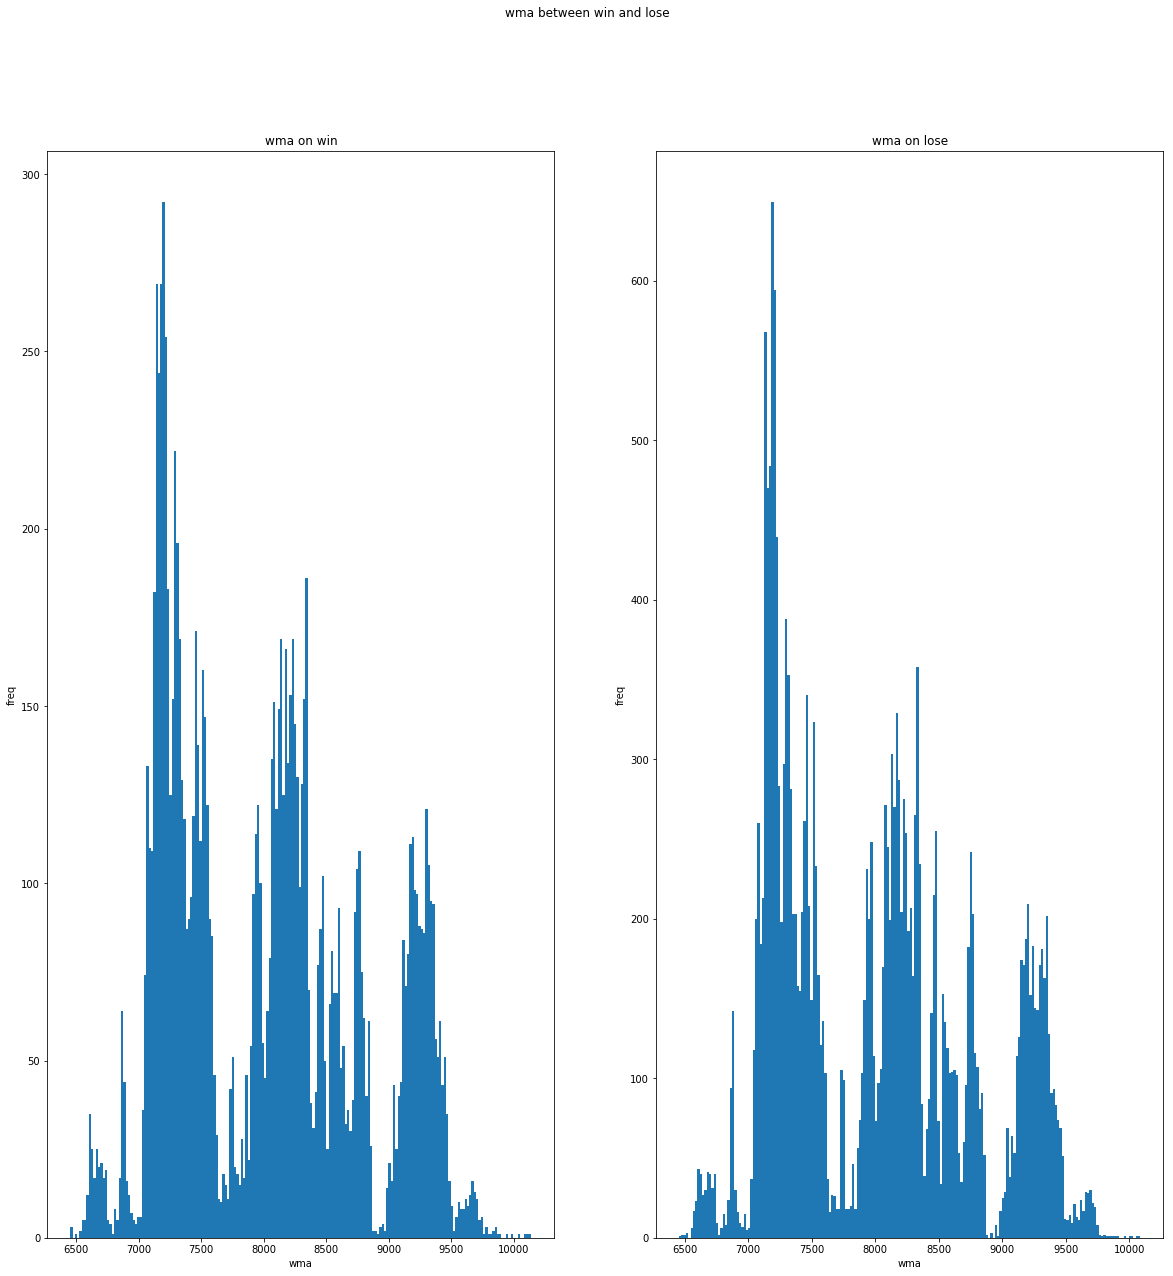

win wma mean => 8012.712193081335
lose wma mean => 7992.759670750593
win wma standard deviation => 768.3262792899673
lose wma standard deviation => 767.205153436833
win wma median => 8034.589784946236
lose wma median => 7980.5924731182795


In [15]:
create_hist(win_merged_close, lose_merged_close, "wma")
create_hist(win_merged_open, lose_merged_open, "wma")

### WMA
#### close
3つの山が存在することが見て取れる。
この中の山の部分の勝率を見ると全体の平均値を上回っているようである。

#### open
変化なし